# Dogs vs Cats

https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import vgg16

print(tf.__version__)
print(tf.executing_eagerly())

2.3.0
True


In [2]:
import os 
#os.chdir ('E://Netology/CV/lectures-master/006')

In [3]:
import zipfile 

In [4]:
!unzip "../input/dogs-vs-cats-redux-kernels-edition/train.zip"

Archive:  ../input/dogs-vs-cats-redux-kernels-edition/train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  in

  inflating: train/cat.10210.jpg     
  inflating: train/cat.10211.jpg     
  inflating: train/cat.10212.jpg     
  inflating: train/cat.10213.jpg     
  inflating: train/cat.10214.jpg     
  inflating: train/cat.10215.jpg     
  inflating: train/cat.10216.jpg     
  inflating: train/cat.10217.jpg     
  inflating: train/cat.10218.jpg     
  inflating: train/cat.10219.jpg     
  inflating: train/cat.1022.jpg      
  inflating: train/cat.10220.jpg     
  inflating: train/cat.10221.jpg     
  inflating: train/cat.10222.jpg     
  inflating: train/cat.10223.jpg     
  inflating: train/cat.10224.jpg     
  inflating: train/cat.10225.jpg     
  inflating: train/cat.10226.jpg     
  inflating: train/cat.10227.jpg     
  inflating: train/cat.10228.jpg     
  inflating: train/cat.10229.jpg     
  inflating: train/cat.1023.jpg      
  inflating: train/cat.10230.jpg     
  inflating: train/cat.10231.jpg     
  inflating: train/cat.10232.jpg     
  inflating: train/cat.10233.jpg     
  inflating:

  inflating: train/cat.10539.jpg     
  inflating: train/cat.1054.jpg      
  inflating: train/cat.10540.jpg     
  inflating: train/cat.10541.jpg     
  inflating: train/cat.10542.jpg     
  inflating: train/cat.10543.jpg     
  inflating: train/cat.10544.jpg     
  inflating: train/cat.10545.jpg     
  inflating: train/cat.10546.jpg     
  inflating: train/cat.10547.jpg     
  inflating: train/cat.10548.jpg     
  inflating: train/cat.10549.jpg     
  inflating: train/cat.1055.jpg      
  inflating: train/cat.10550.jpg     
  inflating: train/cat.10551.jpg     
  inflating: train/cat.10552.jpg     
  inflating: train/cat.10553.jpg     
  inflating: train/cat.10554.jpg     
  inflating: train/cat.10555.jpg     
  inflating: train/cat.10556.jpg     
  inflating: train/cat.10557.jpg     
  inflating: train/cat.10558.jpg     
  inflating: train/cat.10559.jpg     
  inflating: train/cat.1056.jpg      
  inflating: train/cat.10560.jpg     
  inflating: train/cat.10561.jpg     
  inflating:

  inflating: train/cat.10845.jpg     
  inflating: train/cat.10846.jpg     
  inflating: train/cat.10847.jpg     
  inflating: train/cat.10848.jpg     
  inflating: train/cat.10849.jpg     
  inflating: train/cat.1085.jpg      
  inflating: train/cat.10850.jpg     
  inflating: train/cat.10851.jpg     
  inflating: train/cat.10852.jpg     
  inflating: train/cat.10853.jpg     
  inflating: train/cat.10854.jpg     
  inflating: train/cat.10855.jpg     
  inflating: train/cat.10856.jpg     
  inflating: train/cat.10857.jpg     
  inflating: train/cat.10858.jpg     
  inflating: train/cat.10859.jpg     
  inflating: train/cat.1086.jpg      
  inflating: train/cat.10860.jpg     
  inflating: train/cat.10861.jpg     
  inflating: train/cat.10862.jpg     
  inflating: train/cat.10863.jpg     
  inflating: train/cat.10864.jpg     
  inflating: train/cat.10865.jpg     
  inflating: train/cat.10866.jpg     
  inflating: train/cat.10867.jpg     
  inflating: train/cat.10868.jpg     
  inflating:

  inflating: train/cat.11176.jpg     
  inflating: train/cat.11177.jpg     
  inflating: train/cat.11178.jpg     
  inflating: train/cat.11179.jpg     
  inflating: train/cat.1118.jpg      
  inflating: train/cat.11180.jpg     
  inflating: train/cat.11181.jpg     
  inflating: train/cat.11182.jpg     
  inflating: train/cat.11183.jpg     
  inflating: train/cat.11184.jpg     
  inflating: train/cat.11185.jpg     
  inflating: train/cat.11186.jpg     
  inflating: train/cat.11187.jpg     
  inflating: train/cat.11188.jpg     
  inflating: train/cat.11189.jpg     
  inflating: train/cat.1119.jpg      
  inflating: train/cat.11190.jpg     
  inflating: train/cat.11191.jpg     
  inflating: train/cat.11192.jpg     
  inflating: train/cat.11193.jpg     
  inflating: train/cat.11194.jpg     
  inflating: train/cat.11195.jpg     
  inflating: train/cat.11196.jpg     
  inflating: train/cat.11197.jpg     
  inflating: train/cat.11198.jpg     
  inflating: train/cat.11199.jpg     
  inflating:

  inflating: train/cat.11503.jpg     
  inflating: train/cat.11504.jpg     
  inflating: train/cat.11505.jpg     
  inflating: train/cat.11506.jpg     
  inflating: train/cat.11507.jpg     
  inflating: train/cat.11508.jpg     
  inflating: train/cat.11509.jpg     
  inflating: train/cat.1151.jpg      
  inflating: train/cat.11510.jpg     
  inflating: train/cat.11511.jpg     
  inflating: train/cat.11512.jpg     
  inflating: train/cat.11513.jpg     
  inflating: train/cat.11514.jpg     
  inflating: train/cat.11515.jpg     
  inflating: train/cat.11516.jpg     
  inflating: train/cat.11517.jpg     
  inflating: train/cat.11518.jpg     
  inflating: train/cat.11519.jpg     
  inflating: train/cat.1152.jpg      
  inflating: train/cat.11520.jpg     
  inflating: train/cat.11521.jpg     
  inflating: train/cat.11522.jpg     
  inflating: train/cat.11523.jpg     
  inflating: train/cat.11524.jpg     
  inflating: train/cat.11525.jpg     
  inflating: train/cat.11526.jpg     
  inflating:

  inflating: train/cat.11739.jpg     
  inflating: train/cat.1174.jpg      
  inflating: train/cat.11740.jpg     
  inflating: train/cat.11741.jpg     
  inflating: train/cat.11742.jpg     
  inflating: train/cat.11743.jpg     
  inflating: train/cat.11744.jpg     
  inflating: train/cat.11745.jpg     
  inflating: train/cat.11746.jpg     
  inflating: train/cat.11747.jpg     
  inflating: train/cat.11748.jpg     
  inflating: train/cat.11749.jpg     
  inflating: train/cat.1175.jpg      
  inflating: train/cat.11750.jpg     
  inflating: train/cat.11751.jpg     
  inflating: train/cat.11752.jpg     
  inflating: train/cat.11753.jpg     
  inflating: train/cat.11754.jpg     
  inflating: train/cat.11755.jpg     
  inflating: train/cat.11756.jpg     
  inflating: train/cat.11757.jpg     
  inflating: train/cat.11758.jpg     
  inflating: train/cat.11759.jpg     
  inflating: train/cat.1176.jpg      
  inflating: train/cat.11760.jpg     
  inflating: train/cat.11761.jpg     
  inflating:

  inflating: train/cat.12048.jpg     
  inflating: train/cat.12049.jpg     
  inflating: train/cat.1205.jpg      
  inflating: train/cat.12050.jpg     
  inflating: train/cat.12051.jpg     
  inflating: train/cat.12052.jpg     
  inflating: train/cat.12053.jpg     
  inflating: train/cat.12054.jpg     
  inflating: train/cat.12055.jpg     
  inflating: train/cat.12056.jpg     
  inflating: train/cat.12057.jpg     
  inflating: train/cat.12058.jpg     
  inflating: train/cat.12059.jpg     
  inflating: train/cat.1206.jpg      
  inflating: train/cat.12060.jpg     
  inflating: train/cat.12061.jpg     
  inflating: train/cat.12062.jpg     
  inflating: train/cat.12063.jpg     
  inflating: train/cat.12064.jpg     
  inflating: train/cat.12065.jpg     
  inflating: train/cat.12066.jpg     
  inflating: train/cat.12067.jpg     
  inflating: train/cat.12068.jpg     
  inflating: train/cat.12069.jpg     
  inflating: train/cat.1207.jpg      
  inflating: train/cat.12070.jpg     
  inflating:

  inflating: train/cat.12327.jpg     
  inflating: train/cat.12328.jpg     
  inflating: train/cat.12329.jpg     
  inflating: train/cat.1233.jpg      
  inflating: train/cat.12330.jpg     
  inflating: train/cat.12331.jpg     
  inflating: train/cat.12332.jpg     
  inflating: train/cat.12333.jpg     
  inflating: train/cat.12334.jpg     
  inflating: train/cat.12335.jpg     
  inflating: train/cat.12336.jpg     
  inflating: train/cat.12337.jpg     
  inflating: train/cat.12338.jpg     
  inflating: train/cat.12339.jpg     
  inflating: train/cat.1234.jpg      
  inflating: train/cat.12340.jpg     
  inflating: train/cat.12341.jpg     
  inflating: train/cat.12342.jpg     
  inflating: train/cat.12343.jpg     
  inflating: train/cat.12344.jpg     
  inflating: train/cat.12345.jpg     
  inflating: train/cat.12346.jpg     
  inflating: train/cat.12347.jpg     
  inflating: train/cat.12348.jpg     
  inflating: train/cat.12349.jpg     
  inflating: train/cat.1235.jpg      
  inflating:

  inflating: train/cat.1382.jpg      
  inflating: train/cat.1383.jpg      
  inflating: train/cat.1384.jpg      
  inflating: train/cat.1385.jpg      
  inflating: train/cat.1386.jpg      
  inflating: train/cat.1387.jpg      
  inflating: train/cat.1388.jpg      
  inflating: train/cat.1389.jpg      
  inflating: train/cat.139.jpg       
  inflating: train/cat.1390.jpg      
  inflating: train/cat.1391.jpg      
  inflating: train/cat.1392.jpg      
  inflating: train/cat.1393.jpg      
  inflating: train/cat.1394.jpg      
  inflating: train/cat.1395.jpg      
  inflating: train/cat.1396.jpg      
  inflating: train/cat.1397.jpg      
  inflating: train/cat.1398.jpg      
  inflating: train/cat.1399.jpg      
  inflating: train/cat.14.jpg        
  inflating: train/cat.140.jpg       
  inflating: train/cat.1400.jpg      
  inflating: train/cat.1401.jpg      
  inflating: train/cat.1402.jpg      
  inflating: train/cat.1403.jpg      
  inflating: train/cat.1404.jpg      
  inflating:

  inflating: train/cat.1611.jpg      
  inflating: train/cat.1612.jpg      
  inflating: train/cat.1613.jpg      
  inflating: train/cat.1614.jpg      
  inflating: train/cat.1615.jpg      
  inflating: train/cat.1616.jpg      
  inflating: train/cat.1617.jpg      
  inflating: train/cat.1618.jpg      
  inflating: train/cat.1619.jpg      
  inflating: train/cat.162.jpg       
  inflating: train/cat.1620.jpg      
  inflating: train/cat.1621.jpg      
  inflating: train/cat.1622.jpg      
  inflating: train/cat.1623.jpg      
  inflating: train/cat.1624.jpg      
  inflating: train/cat.1625.jpg      
  inflating: train/cat.1626.jpg      
  inflating: train/cat.1627.jpg      
  inflating: train/cat.1628.jpg      
  inflating: train/cat.1629.jpg      
  inflating: train/cat.163.jpg       
  inflating: train/cat.1630.jpg      
  inflating: train/cat.1631.jpg      
  inflating: train/cat.1632.jpg      
  inflating: train/cat.1633.jpg      
  inflating: train/cat.1634.jpg      
  inflating:

  inflating: train/cat.1872.jpg      
  inflating: train/cat.1873.jpg      
  inflating: train/cat.1874.jpg      
  inflating: train/cat.1875.jpg      
  inflating: train/cat.1876.jpg      
  inflating: train/cat.1877.jpg      
  inflating: train/cat.1878.jpg      
  inflating: train/cat.1879.jpg      
  inflating: train/cat.188.jpg       
  inflating: train/cat.1880.jpg      
  inflating: train/cat.1881.jpg      
  inflating: train/cat.1882.jpg      
  inflating: train/cat.1883.jpg      
  inflating: train/cat.1884.jpg      
  inflating: train/cat.1885.jpg      
  inflating: train/cat.1886.jpg      
  inflating: train/cat.1887.jpg      
  inflating: train/cat.1888.jpg      
  inflating: train/cat.1889.jpg      
  inflating: train/cat.189.jpg       
  inflating: train/cat.1890.jpg      
  inflating: train/cat.1891.jpg      
  inflating: train/cat.1892.jpg      
  inflating: train/cat.1893.jpg      
  inflating: train/cat.1894.jpg      
  inflating: train/cat.1895.jpg      
  inflating:

  inflating: train/cat.2132.jpg      
  inflating: train/cat.2133.jpg      
  inflating: train/cat.2134.jpg      
  inflating: train/cat.2135.jpg      
  inflating: train/cat.2136.jpg      
  inflating: train/cat.2137.jpg      
  inflating: train/cat.2138.jpg      
  inflating: train/cat.2139.jpg      
  inflating: train/cat.214.jpg       
  inflating: train/cat.2140.jpg      
  inflating: train/cat.2141.jpg      
  inflating: train/cat.2142.jpg      
  inflating: train/cat.2143.jpg      
  inflating: train/cat.2144.jpg      
  inflating: train/cat.2145.jpg      
  inflating: train/cat.2146.jpg      
  inflating: train/cat.2147.jpg      
  inflating: train/cat.2148.jpg      
  inflating: train/cat.2149.jpg      
  inflating: train/cat.215.jpg       
  inflating: train/cat.2150.jpg      
  inflating: train/cat.2151.jpg      
  inflating: train/cat.2152.jpg      
  inflating: train/cat.2153.jpg      
  inflating: train/cat.2154.jpg      
  inflating: train/cat.2155.jpg      
  inflating:

  inflating: train/cat.2404.jpg      
  inflating: train/cat.2405.jpg      
  inflating: train/cat.2406.jpg      
  inflating: train/cat.2407.jpg      
  inflating: train/cat.2408.jpg      
  inflating: train/cat.2409.jpg      
  inflating: train/cat.241.jpg       
  inflating: train/cat.2410.jpg      
  inflating: train/cat.2411.jpg      
  inflating: train/cat.2412.jpg      
  inflating: train/cat.2413.jpg      
  inflating: train/cat.2414.jpg      
  inflating: train/cat.2415.jpg      
  inflating: train/cat.2416.jpg      
  inflating: train/cat.2417.jpg      
  inflating: train/cat.2418.jpg      
  inflating: train/cat.2419.jpg      
  inflating: train/cat.242.jpg       
  inflating: train/cat.2420.jpg      
  inflating: train/cat.2421.jpg      
  inflating: train/cat.2422.jpg      
  inflating: train/cat.2423.jpg      
  inflating: train/cat.2424.jpg      
  inflating: train/cat.2425.jpg      
  inflating: train/cat.2426.jpg      
  inflating: train/cat.2427.jpg      
  inflating:

  inflating: train/cat.2688.jpg      
  inflating: train/cat.2689.jpg      
  inflating: train/cat.269.jpg       
  inflating: train/cat.2690.jpg      
  inflating: train/cat.2691.jpg      
  inflating: train/cat.2692.jpg      
  inflating: train/cat.2693.jpg      
  inflating: train/cat.2694.jpg      
  inflating: train/cat.2695.jpg      
  inflating: train/cat.2696.jpg      
  inflating: train/cat.2697.jpg      
  inflating: train/cat.2698.jpg      
  inflating: train/cat.2699.jpg      
  inflating: train/cat.27.jpg        
  inflating: train/cat.270.jpg       
  inflating: train/cat.2700.jpg      
  inflating: train/cat.2701.jpg      
  inflating: train/cat.2702.jpg      
  inflating: train/cat.2703.jpg      
  inflating: train/cat.2704.jpg      
  inflating: train/cat.2705.jpg      
  inflating: train/cat.2706.jpg      
  inflating: train/cat.2707.jpg      
  inflating: train/cat.2708.jpg      
  inflating: train/cat.2709.jpg      
  inflating: train/cat.271.jpg       
  inflating:

  inflating: train/cat.3215.jpg      
  inflating: train/cat.3216.jpg      
  inflating: train/cat.3217.jpg      
  inflating: train/cat.3218.jpg      
  inflating: train/cat.3219.jpg      
  inflating: train/cat.322.jpg       
  inflating: train/cat.3220.jpg      
  inflating: train/cat.3221.jpg      
  inflating: train/cat.3222.jpg      
  inflating: train/cat.3223.jpg      
  inflating: train/cat.3224.jpg      
  inflating: train/cat.3225.jpg      
  inflating: train/cat.3226.jpg      
  inflating: train/cat.3227.jpg      
  inflating: train/cat.3228.jpg      
  inflating: train/cat.3229.jpg      
  inflating: train/cat.323.jpg       
  inflating: train/cat.3230.jpg      
  inflating: train/cat.3231.jpg      
  inflating: train/cat.3232.jpg      
  inflating: train/cat.3233.jpg      
  inflating: train/cat.3234.jpg      
  inflating: train/cat.3235.jpg      
  inflating: train/cat.3236.jpg      
  inflating: train/cat.3237.jpg      
  inflating: train/cat.3238.jpg      
  inflating:

  inflating: train/cat.3435.jpg      
  inflating: train/cat.3436.jpg      
  inflating: train/cat.3437.jpg      
  inflating: train/cat.3438.jpg      
  inflating: train/cat.3439.jpg      
  inflating: train/cat.344.jpg       
  inflating: train/cat.3440.jpg      
  inflating: train/cat.3441.jpg      
  inflating: train/cat.3442.jpg      
  inflating: train/cat.3443.jpg      
  inflating: train/cat.3444.jpg      
  inflating: train/cat.3445.jpg      
  inflating: train/cat.3446.jpg      
  inflating: train/cat.3447.jpg      
  inflating: train/cat.3448.jpg      
  inflating: train/cat.3449.jpg      
  inflating: train/cat.345.jpg       
  inflating: train/cat.3450.jpg      
  inflating: train/cat.3451.jpg      
  inflating: train/cat.3452.jpg      
  inflating: train/cat.3453.jpg      
  inflating: train/cat.3454.jpg      
  inflating: train/cat.3455.jpg      
  inflating: train/cat.3456.jpg      
  inflating: train/cat.3457.jpg      
  inflating: train/cat.3458.jpg      
  inflating:

  inflating: train/cat.3733.jpg      
  inflating: train/cat.3734.jpg      
  inflating: train/cat.3735.jpg      
  inflating: train/cat.3736.jpg      
  inflating: train/cat.3737.jpg      
  inflating: train/cat.3738.jpg      
  inflating: train/cat.3739.jpg      
  inflating: train/cat.374.jpg       
  inflating: train/cat.3740.jpg      
  inflating: train/cat.3741.jpg      
  inflating: train/cat.3742.jpg      
  inflating: train/cat.3743.jpg      
  inflating: train/cat.3744.jpg      
  inflating: train/cat.3745.jpg      
  inflating: train/cat.3746.jpg      
  inflating: train/cat.3747.jpg      
  inflating: train/cat.3748.jpg      
  inflating: train/cat.3749.jpg      
  inflating: train/cat.375.jpg       
  inflating: train/cat.3750.jpg      
  inflating: train/cat.3751.jpg      
  inflating: train/cat.3752.jpg      
  inflating: train/cat.3753.jpg      
  inflating: train/cat.3754.jpg      
  inflating: train/cat.3755.jpg      
  inflating: train/cat.3756.jpg      
  inflating:

  inflating: train/cat.4070.jpg      
  inflating: train/cat.4071.jpg      
  inflating: train/cat.4072.jpg      
  inflating: train/cat.4073.jpg      
  inflating: train/cat.4074.jpg      
  inflating: train/cat.4075.jpg      
  inflating: train/cat.4076.jpg      
  inflating: train/cat.4077.jpg      
  inflating: train/cat.4078.jpg      
  inflating: train/cat.4079.jpg      
  inflating: train/cat.408.jpg       
  inflating: train/cat.4080.jpg      
  inflating: train/cat.4081.jpg      
  inflating: train/cat.4082.jpg      
  inflating: train/cat.4083.jpg      
  inflating: train/cat.4084.jpg      
  inflating: train/cat.4085.jpg      
  inflating: train/cat.4086.jpg      
  inflating: train/cat.4087.jpg      
  inflating: train/cat.4088.jpg      
  inflating: train/cat.4089.jpg      
  inflating: train/cat.409.jpg       
  inflating: train/cat.4090.jpg      
  inflating: train/cat.4091.jpg      
  inflating: train/cat.4092.jpg      
  inflating: train/cat.4093.jpg      
  inflating:

  inflating: train/cat.4378.jpg      
  inflating: train/cat.4379.jpg      
  inflating: train/cat.438.jpg       
  inflating: train/cat.4380.jpg      
  inflating: train/cat.4381.jpg      
  inflating: train/cat.4382.jpg      
  inflating: train/cat.4383.jpg      
  inflating: train/cat.4384.jpg      
  inflating: train/cat.4385.jpg      
  inflating: train/cat.4386.jpg      
  inflating: train/cat.4387.jpg      
  inflating: train/cat.4388.jpg      
  inflating: train/cat.4389.jpg      
  inflating: train/cat.439.jpg       
  inflating: train/cat.4390.jpg      
  inflating: train/cat.4391.jpg      
  inflating: train/cat.4392.jpg      
  inflating: train/cat.4393.jpg      
  inflating: train/cat.4394.jpg      
  inflating: train/cat.4395.jpg      
  inflating: train/cat.4396.jpg      
  inflating: train/cat.4397.jpg      
  inflating: train/cat.4398.jpg      
  inflating: train/cat.4399.jpg      
  inflating: train/cat.44.jpg        
  inflating: train/cat.440.jpg       
  inflating:

  inflating: train/cat.4711.jpg      
  inflating: train/cat.4712.jpg      
  inflating: train/cat.4713.jpg      
  inflating: train/cat.4714.jpg      
  inflating: train/cat.4715.jpg      
  inflating: train/cat.4716.jpg      
  inflating: train/cat.4717.jpg      
  inflating: train/cat.4718.jpg      
  inflating: train/cat.4719.jpg      
  inflating: train/cat.472.jpg       
  inflating: train/cat.4720.jpg      
  inflating: train/cat.4721.jpg      
  inflating: train/cat.4722.jpg      
  inflating: train/cat.4723.jpg      
  inflating: train/cat.4724.jpg      
  inflating: train/cat.4725.jpg      
  inflating: train/cat.4726.jpg      
  inflating: train/cat.4727.jpg      
  inflating: train/cat.4728.jpg      
  inflating: train/cat.4729.jpg      
  inflating: train/cat.473.jpg       
  inflating: train/cat.4730.jpg      
  inflating: train/cat.4731.jpg      
  inflating: train/cat.4732.jpg      
  inflating: train/cat.4733.jpg      
  inflating: train/cat.4734.jpg      
  inflating:

  inflating: train/cat.5019.jpg      
  inflating: train/cat.502.jpg       
  inflating: train/cat.5020.jpg      
  inflating: train/cat.5021.jpg      
  inflating: train/cat.5022.jpg      
  inflating: train/cat.5023.jpg      
  inflating: train/cat.5024.jpg      
  inflating: train/cat.5025.jpg      
  inflating: train/cat.5026.jpg      
  inflating: train/cat.5027.jpg      
  inflating: train/cat.5028.jpg      
  inflating: train/cat.5029.jpg      
  inflating: train/cat.503.jpg       
  inflating: train/cat.5030.jpg      
  inflating: train/cat.5031.jpg      
  inflating: train/cat.5032.jpg      
  inflating: train/cat.5033.jpg      
  inflating: train/cat.5034.jpg      
  inflating: train/cat.5035.jpg      
  inflating: train/cat.5036.jpg      
  inflating: train/cat.5037.jpg      
  inflating: train/cat.5038.jpg      
  inflating: train/cat.5039.jpg      
  inflating: train/cat.504.jpg       
  inflating: train/cat.5040.jpg      
  inflating: train/cat.5041.jpg      
  inflating:

  inflating: train/cat.5344.jpg      
  inflating: train/cat.5345.jpg      
  inflating: train/cat.5346.jpg      
  inflating: train/cat.5347.jpg      
  inflating: train/cat.5348.jpg      
  inflating: train/cat.5349.jpg      
  inflating: train/cat.535.jpg       
  inflating: train/cat.5350.jpg      
  inflating: train/cat.5351.jpg      
  inflating: train/cat.5352.jpg      
  inflating: train/cat.5353.jpg      
  inflating: train/cat.5354.jpg      
  inflating: train/cat.5355.jpg      
  inflating: train/cat.5356.jpg      
  inflating: train/cat.5357.jpg      
  inflating: train/cat.5358.jpg      
  inflating: train/cat.5359.jpg      
  inflating: train/cat.536.jpg       
  inflating: train/cat.5360.jpg      
  inflating: train/cat.5361.jpg      
  inflating: train/cat.5362.jpg      
  inflating: train/cat.5363.jpg      
  inflating: train/cat.5364.jpg      
  inflating: train/cat.5365.jpg      
  inflating: train/cat.5366.jpg      
  inflating: train/cat.5367.jpg      
  inflating:

  inflating: train/cat.5641.jpg      
  inflating: train/cat.5642.jpg      
  inflating: train/cat.5643.jpg      
  inflating: train/cat.5644.jpg      
  inflating: train/cat.5645.jpg      
  inflating: train/cat.5646.jpg      
  inflating: train/cat.5647.jpg      
  inflating: train/cat.5648.jpg      
  inflating: train/cat.5649.jpg      
  inflating: train/cat.565.jpg       
  inflating: train/cat.5650.jpg      
  inflating: train/cat.5651.jpg      
  inflating: train/cat.5652.jpg      
  inflating: train/cat.5653.jpg      
  inflating: train/cat.5654.jpg      
  inflating: train/cat.5655.jpg      
  inflating: train/cat.5656.jpg      
  inflating: train/cat.5657.jpg      
  inflating: train/cat.5658.jpg      
  inflating: train/cat.5659.jpg      
  inflating: train/cat.566.jpg       
  inflating: train/cat.5660.jpg      
  inflating: train/cat.5661.jpg      
  inflating: train/cat.5662.jpg      
  inflating: train/cat.5663.jpg      
  inflating: train/cat.5664.jpg      
  inflating:

  inflating: train/cat.5958.jpg      
  inflating: train/cat.5959.jpg      
  inflating: train/cat.596.jpg       
  inflating: train/cat.5960.jpg      
  inflating: train/cat.5961.jpg      
  inflating: train/cat.5962.jpg      
  inflating: train/cat.5963.jpg      
  inflating: train/cat.5964.jpg      
  inflating: train/cat.5965.jpg      
  inflating: train/cat.5966.jpg      
  inflating: train/cat.5967.jpg      
  inflating: train/cat.5968.jpg      
  inflating: train/cat.5969.jpg      
  inflating: train/cat.597.jpg       
  inflating: train/cat.5970.jpg      
  inflating: train/cat.5971.jpg      
  inflating: train/cat.5972.jpg      
  inflating: train/cat.5973.jpg      
  inflating: train/cat.5974.jpg      
  inflating: train/cat.5975.jpg      
  inflating: train/cat.5976.jpg      
  inflating: train/cat.5977.jpg      
  inflating: train/cat.5978.jpg      
  inflating: train/cat.5979.jpg      
  inflating: train/cat.598.jpg       
  inflating: train/cat.5980.jpg      
  inflating:

  inflating: train/cat.6259.jpg      
  inflating: train/cat.626.jpg       
  inflating: train/cat.6260.jpg      
  inflating: train/cat.6261.jpg      
  inflating: train/cat.6262.jpg      
  inflating: train/cat.6263.jpg      
  inflating: train/cat.6264.jpg      
  inflating: train/cat.6265.jpg      
  inflating: train/cat.6266.jpg      
  inflating: train/cat.6267.jpg      
  inflating: train/cat.6268.jpg      
  inflating: train/cat.6269.jpg      
  inflating: train/cat.627.jpg       
  inflating: train/cat.6270.jpg      
  inflating: train/cat.6271.jpg      
  inflating: train/cat.6272.jpg      
  inflating: train/cat.6273.jpg      
  inflating: train/cat.6274.jpg      
  inflating: train/cat.6275.jpg      
  inflating: train/cat.6276.jpg      
  inflating: train/cat.6277.jpg      
  inflating: train/cat.6278.jpg      
  inflating: train/cat.6279.jpg      
  inflating: train/cat.628.jpg       
  inflating: train/cat.6280.jpg      
  inflating: train/cat.6281.jpg      
  inflating:

  inflating: train/cat.6586.jpg      
  inflating: train/cat.6587.jpg      
  inflating: train/cat.6588.jpg      
  inflating: train/cat.6589.jpg      
  inflating: train/cat.659.jpg       
  inflating: train/cat.6590.jpg      
  inflating: train/cat.6591.jpg      
  inflating: train/cat.6592.jpg      
  inflating: train/cat.6593.jpg      
  inflating: train/cat.6594.jpg      
  inflating: train/cat.6595.jpg      
  inflating: train/cat.6596.jpg      
  inflating: train/cat.6597.jpg      
  inflating: train/cat.6598.jpg      
  inflating: train/cat.6599.jpg      
  inflating: train/cat.66.jpg        
  inflating: train/cat.660.jpg       
  inflating: train/cat.6600.jpg      
  inflating: train/cat.6601.jpg      
  inflating: train/cat.6602.jpg      
  inflating: train/cat.6603.jpg      
  inflating: train/cat.6604.jpg      
  inflating: train/cat.6605.jpg      
  inflating: train/cat.6606.jpg      
  inflating: train/cat.6607.jpg      
  inflating: train/cat.6608.jpg      
  inflating:

  inflating: train/cat.6887.jpg      
  inflating: train/cat.6888.jpg      
  inflating: train/cat.6889.jpg      
  inflating: train/cat.689.jpg       
  inflating: train/cat.6890.jpg      
  inflating: train/cat.6891.jpg      
  inflating: train/cat.6892.jpg      
  inflating: train/cat.6893.jpg      
  inflating: train/cat.6894.jpg      
  inflating: train/cat.6895.jpg      
  inflating: train/cat.6896.jpg      
  inflating: train/cat.6897.jpg      
  inflating: train/cat.6898.jpg      
  inflating: train/cat.6899.jpg      
  inflating: train/cat.69.jpg        
  inflating: train/cat.690.jpg       
  inflating: train/cat.6900.jpg      
  inflating: train/cat.6901.jpg      
  inflating: train/cat.6902.jpg      
  inflating: train/cat.6903.jpg      
  inflating: train/cat.6904.jpg      
  inflating: train/cat.6905.jpg      
  inflating: train/cat.6906.jpg      
  inflating: train/cat.6907.jpg      
  inflating: train/cat.6908.jpg      
  inflating: train/cat.6909.jpg      
  inflating:

  inflating: train/cat.7222.jpg      
  inflating: train/cat.7223.jpg      
  inflating: train/cat.7224.jpg      
  inflating: train/cat.7225.jpg      
  inflating: train/cat.7226.jpg      
  inflating: train/cat.7227.jpg      
  inflating: train/cat.7228.jpg      
  inflating: train/cat.7229.jpg      
  inflating: train/cat.723.jpg       
  inflating: train/cat.7230.jpg      
  inflating: train/cat.7231.jpg      
  inflating: train/cat.7232.jpg      
  inflating: train/cat.7233.jpg      
  inflating: train/cat.7234.jpg      
  inflating: train/cat.7235.jpg      
  inflating: train/cat.7236.jpg      
  inflating: train/cat.7237.jpg      
  inflating: train/cat.7238.jpg      
  inflating: train/cat.7239.jpg      
  inflating: train/cat.724.jpg       
  inflating: train/cat.7240.jpg      
  inflating: train/cat.7241.jpg      
  inflating: train/cat.7242.jpg      
  inflating: train/cat.7243.jpg      
  inflating: train/cat.7244.jpg      
  inflating: train/cat.7245.jpg      
  inflating:

  inflating: train/cat.7558.jpg      
  inflating: train/cat.7559.jpg      
  inflating: train/cat.756.jpg       
  inflating: train/cat.7560.jpg      
  inflating: train/cat.7561.jpg      
  inflating: train/cat.7562.jpg      
  inflating: train/cat.7563.jpg      
  inflating: train/cat.7564.jpg      
  inflating: train/cat.7565.jpg      
  inflating: train/cat.7566.jpg      
  inflating: train/cat.7567.jpg      
  inflating: train/cat.7568.jpg      
  inflating: train/cat.7569.jpg      
  inflating: train/cat.757.jpg       
  inflating: train/cat.7570.jpg      
  inflating: train/cat.7571.jpg      
  inflating: train/cat.7572.jpg      
  inflating: train/cat.7573.jpg      
  inflating: train/cat.7574.jpg      
  inflating: train/cat.7575.jpg      
  inflating: train/cat.7576.jpg      
  inflating: train/cat.7577.jpg      
  inflating: train/cat.7578.jpg      
  inflating: train/cat.7579.jpg      
  inflating: train/cat.758.jpg       
  inflating: train/cat.7580.jpg      
  inflating:

  inflating: train/cat.7866.jpg      
  inflating: train/cat.7867.jpg      
  inflating: train/cat.7868.jpg      
  inflating: train/cat.7869.jpg      
  inflating: train/cat.787.jpg       
  inflating: train/cat.7870.jpg      
  inflating: train/cat.7871.jpg      
  inflating: train/cat.7872.jpg      
  inflating: train/cat.7873.jpg      
  inflating: train/cat.7874.jpg      
  inflating: train/cat.7875.jpg      
  inflating: train/cat.7876.jpg      
  inflating: train/cat.7877.jpg      
  inflating: train/cat.7878.jpg      
  inflating: train/cat.7879.jpg      
  inflating: train/cat.788.jpg       
  inflating: train/cat.7880.jpg      
  inflating: train/cat.7881.jpg      
  inflating: train/cat.7882.jpg      
  inflating: train/cat.7883.jpg      
  inflating: train/cat.7884.jpg      
  inflating: train/cat.7885.jpg      
  inflating: train/cat.7886.jpg      
  inflating: train/cat.7887.jpg      
  inflating: train/cat.7888.jpg      
  inflating: train/cat.7889.jpg      
  inflating:

  inflating: train/cat.820.jpg       
  inflating: train/cat.8200.jpg      
  inflating: train/cat.8201.jpg      
  inflating: train/cat.8202.jpg      
  inflating: train/cat.8203.jpg      
  inflating: train/cat.8204.jpg      
  inflating: train/cat.8205.jpg      
  inflating: train/cat.8206.jpg      
  inflating: train/cat.8207.jpg      
  inflating: train/cat.8208.jpg      
  inflating: train/cat.8209.jpg      
  inflating: train/cat.821.jpg       
  inflating: train/cat.8210.jpg      
  inflating: train/cat.8211.jpg      
  inflating: train/cat.8212.jpg      
  inflating: train/cat.8213.jpg      
  inflating: train/cat.8214.jpg      
  inflating: train/cat.8215.jpg      
  inflating: train/cat.8216.jpg      
  inflating: train/cat.8217.jpg      
  inflating: train/cat.8218.jpg      
  inflating: train/cat.8219.jpg      
  inflating: train/cat.822.jpg       
  inflating: train/cat.8220.jpg      
  inflating: train/cat.8221.jpg      
  inflating: train/cat.8222.jpg      
  inflating:

  inflating: train/cat.8512.jpg      
  inflating: train/cat.8513.jpg      
  inflating: train/cat.8514.jpg      
  inflating: train/cat.8515.jpg      
  inflating: train/cat.8516.jpg      
  inflating: train/cat.8517.jpg      
  inflating: train/cat.8518.jpg      
  inflating: train/cat.8519.jpg      
  inflating: train/cat.852.jpg       
  inflating: train/cat.8520.jpg      
  inflating: train/cat.8521.jpg      
  inflating: train/cat.8522.jpg      
  inflating: train/cat.8523.jpg      
  inflating: train/cat.8524.jpg      
  inflating: train/cat.8525.jpg      
  inflating: train/cat.8526.jpg      
  inflating: train/cat.8527.jpg      
  inflating: train/cat.8528.jpg      
  inflating: train/cat.8529.jpg      
  inflating: train/cat.853.jpg       
  inflating: train/cat.8530.jpg      
  inflating: train/cat.8531.jpg      
  inflating: train/cat.8532.jpg      
  inflating: train/cat.8533.jpg      
  inflating: train/cat.8534.jpg      
  inflating: train/cat.8535.jpg      
  inflating:

  inflating: train/cat.8843.jpg      
  inflating: train/cat.8844.jpg      
  inflating: train/cat.8845.jpg      
  inflating: train/cat.8846.jpg      
  inflating: train/cat.8847.jpg      
  inflating: train/cat.8848.jpg      
  inflating: train/cat.8849.jpg      
  inflating: train/cat.885.jpg       
  inflating: train/cat.8850.jpg      
  inflating: train/cat.8851.jpg      
  inflating: train/cat.8852.jpg      
  inflating: train/cat.8853.jpg      
  inflating: train/cat.8854.jpg      
  inflating: train/cat.8855.jpg      
  inflating: train/cat.8856.jpg      
  inflating: train/cat.8857.jpg      
  inflating: train/cat.8858.jpg      
  inflating: train/cat.8859.jpg      
  inflating: train/cat.886.jpg       
  inflating: train/cat.8860.jpg      
  inflating: train/cat.8861.jpg      
  inflating: train/cat.8862.jpg      
  inflating: train/cat.8863.jpg      
  inflating: train/cat.8864.jpg      
  inflating: train/cat.8865.jpg      
  inflating: train/cat.8866.jpg      
  inflating:

  inflating: train/cat.9150.jpg      
  inflating: train/cat.9151.jpg      
  inflating: train/cat.9152.jpg      
  inflating: train/cat.9153.jpg      
  inflating: train/cat.9154.jpg      
  inflating: train/cat.9155.jpg      
  inflating: train/cat.9156.jpg      
  inflating: train/cat.9157.jpg      
  inflating: train/cat.9158.jpg      
  inflating: train/cat.9159.jpg      
  inflating: train/cat.916.jpg       
  inflating: train/cat.9160.jpg      
  inflating: train/cat.9161.jpg      
  inflating: train/cat.9162.jpg      
  inflating: train/cat.9163.jpg      
  inflating: train/cat.9164.jpg      
  inflating: train/cat.9165.jpg      
  inflating: train/cat.9166.jpg      
  inflating: train/cat.9167.jpg      
  inflating: train/cat.9168.jpg      
  inflating: train/cat.9169.jpg      
  inflating: train/cat.917.jpg       
  inflating: train/cat.9170.jpg      
  inflating: train/cat.9171.jpg      
  inflating: train/cat.9172.jpg      
  inflating: train/cat.9173.jpg      
  inflating:

  inflating: train/cat.9492.jpg      
  inflating: train/cat.9493.jpg      
  inflating: train/cat.9494.jpg      
  inflating: train/cat.9495.jpg      
  inflating: train/cat.9496.jpg      
  inflating: train/cat.9497.jpg      
  inflating: train/cat.9498.jpg      
  inflating: train/cat.9499.jpg      
  inflating: train/cat.95.jpg        
  inflating: train/cat.950.jpg       
  inflating: train/cat.9500.jpg      
  inflating: train/cat.9501.jpg      
  inflating: train/cat.9502.jpg      
  inflating: train/cat.9503.jpg      
  inflating: train/cat.9504.jpg      
  inflating: train/cat.9505.jpg      
  inflating: train/cat.9506.jpg      
  inflating: train/cat.9507.jpg      
  inflating: train/cat.9508.jpg      
  inflating: train/cat.9509.jpg      
  inflating: train/cat.951.jpg       
  inflating: train/cat.9510.jpg      
  inflating: train/cat.9511.jpg      
  inflating: train/cat.9512.jpg      
  inflating: train/cat.9513.jpg      
  inflating: train/cat.9514.jpg      
  inflating:

  inflating: train/cat.9818.jpg      
  inflating: train/cat.9819.jpg      
  inflating: train/cat.982.jpg       
  inflating: train/cat.9820.jpg      
  inflating: train/cat.9821.jpg      
  inflating: train/cat.9822.jpg      
  inflating: train/cat.9823.jpg      
  inflating: train/cat.9824.jpg      
  inflating: train/cat.9825.jpg      
  inflating: train/cat.9826.jpg      
  inflating: train/cat.9827.jpg      
  inflating: train/cat.9828.jpg      
  inflating: train/cat.9829.jpg      
  inflating: train/cat.983.jpg       
  inflating: train/cat.9830.jpg      
  inflating: train/cat.9831.jpg      
  inflating: train/cat.9832.jpg      
  inflating: train/cat.9833.jpg      
  inflating: train/cat.9834.jpg      
  inflating: train/cat.9835.jpg      
  inflating: train/cat.9836.jpg      
  inflating: train/cat.9837.jpg      
  inflating: train/cat.9838.jpg      
  inflating: train/cat.9839.jpg      
  inflating: train/cat.984.jpg       
  inflating: train/cat.9840.jpg      
  inflating:

  inflating: train/dog.10125.jpg     
  inflating: train/dog.10126.jpg     
  inflating: train/dog.10127.jpg     
  inflating: train/dog.10128.jpg     
  inflating: train/dog.10129.jpg     
  inflating: train/dog.1013.jpg      
  inflating: train/dog.10130.jpg     
  inflating: train/dog.10131.jpg     
  inflating: train/dog.10132.jpg     
  inflating: train/dog.10133.jpg     
  inflating: train/dog.10134.jpg     
  inflating: train/dog.10135.jpg     
  inflating: train/dog.10136.jpg     
  inflating: train/dog.10137.jpg     
  inflating: train/dog.10138.jpg     
  inflating: train/dog.10139.jpg     
  inflating: train/dog.1014.jpg      
  inflating: train/dog.10140.jpg     
  inflating: train/dog.10141.jpg     
  inflating: train/dog.10142.jpg     
  inflating: train/dog.10143.jpg     
  inflating: train/dog.10144.jpg     
  inflating: train/dog.10145.jpg     
  inflating: train/dog.10146.jpg     
  inflating: train/dog.10147.jpg     
  inflating: train/dog.10148.jpg     
  inflating:

  inflating: train/dog.10416.jpg     
  inflating: train/dog.10417.jpg     
  inflating: train/dog.10418.jpg     
  inflating: train/dog.10419.jpg     
  inflating: train/dog.1042.jpg      
  inflating: train/dog.10420.jpg     
  inflating: train/dog.10421.jpg     
  inflating: train/dog.10422.jpg     
  inflating: train/dog.10423.jpg     
  inflating: train/dog.10424.jpg     
  inflating: train/dog.10425.jpg     
  inflating: train/dog.10426.jpg     
  inflating: train/dog.10427.jpg     
  inflating: train/dog.10428.jpg     
  inflating: train/dog.10429.jpg     
  inflating: train/dog.1043.jpg      
  inflating: train/dog.10430.jpg     
  inflating: train/dog.10431.jpg     
  inflating: train/dog.10432.jpg     
  inflating: train/dog.10433.jpg     
  inflating: train/dog.10434.jpg     
  inflating: train/dog.10435.jpg     
  inflating: train/dog.10436.jpg     
  inflating: train/dog.10437.jpg     
  inflating: train/dog.10438.jpg     
  inflating: train/dog.10439.jpg     
  inflating:

  inflating: train/dog.10709.jpg     
  inflating: train/dog.1071.jpg      
  inflating: train/dog.10710.jpg     
  inflating: train/dog.10711.jpg     
  inflating: train/dog.10712.jpg     
  inflating: train/dog.10713.jpg     
  inflating: train/dog.10714.jpg     
  inflating: train/dog.10715.jpg     
  inflating: train/dog.10716.jpg     
  inflating: train/dog.10717.jpg     
  inflating: train/dog.10718.jpg     
  inflating: train/dog.10719.jpg     
  inflating: train/dog.1072.jpg      
  inflating: train/dog.10720.jpg     
  inflating: train/dog.10721.jpg     
  inflating: train/dog.10722.jpg     
  inflating: train/dog.10723.jpg     
  inflating: train/dog.10724.jpg     
  inflating: train/dog.10725.jpg     
  inflating: train/dog.10726.jpg     
  inflating: train/dog.10727.jpg     
  inflating: train/dog.10728.jpg     
  inflating: train/dog.10729.jpg     
  inflating: train/dog.1073.jpg      
  inflating: train/dog.10730.jpg     
  inflating: train/dog.10731.jpg     
  inflating:

  inflating: train/dog.10996.jpg     
  inflating: train/dog.10997.jpg     
  inflating: train/dog.10998.jpg     
  inflating: train/dog.10999.jpg     
  inflating: train/dog.11.jpg        
  inflating: train/dog.110.jpg       
  inflating: train/dog.1100.jpg      
  inflating: train/dog.11000.jpg     
  inflating: train/dog.11001.jpg     
  inflating: train/dog.11002.jpg     
  inflating: train/dog.11003.jpg     
  inflating: train/dog.11004.jpg     
  inflating: train/dog.11005.jpg     
  inflating: train/dog.11006.jpg     
  inflating: train/dog.11007.jpg     
  inflating: train/dog.11008.jpg     
  inflating: train/dog.11009.jpg     
  inflating: train/dog.1101.jpg      
  inflating: train/dog.11010.jpg     
  inflating: train/dog.11011.jpg     
  inflating: train/dog.11012.jpg     
  inflating: train/dog.11013.jpg     
  inflating: train/dog.11014.jpg     
  inflating: train/dog.11015.jpg     
  inflating: train/dog.11016.jpg     
  inflating: train/dog.11017.jpg     
  inflating:

  inflating: train/dog.11297.jpg     
  inflating: train/dog.11298.jpg     
  inflating: train/dog.11299.jpg     
  inflating: train/dog.113.jpg       
  inflating: train/dog.1130.jpg      
  inflating: train/dog.11300.jpg     
  inflating: train/dog.11301.jpg     
  inflating: train/dog.11302.jpg     
  inflating: train/dog.11303.jpg     
  inflating: train/dog.11304.jpg     
  inflating: train/dog.11305.jpg     
  inflating: train/dog.11306.jpg     
  inflating: train/dog.11307.jpg     
  inflating: train/dog.11308.jpg     
  inflating: train/dog.11309.jpg     
  inflating: train/dog.1131.jpg      
  inflating: train/dog.11310.jpg     
  inflating: train/dog.11311.jpg     
  inflating: train/dog.11312.jpg     
  inflating: train/dog.11313.jpg     
  inflating: train/dog.11314.jpg     
  inflating: train/dog.11315.jpg     
  inflating: train/dog.11316.jpg     
  inflating: train/dog.11317.jpg     
  inflating: train/dog.11318.jpg     
  inflating: train/dog.11319.jpg     
  inflating:

  inflating: train/dog.11578.jpg     
  inflating: train/dog.11579.jpg     
  inflating: train/dog.1158.jpg      
  inflating: train/dog.11580.jpg     
  inflating: train/dog.11581.jpg     
  inflating: train/dog.11582.jpg     
  inflating: train/dog.11583.jpg     
  inflating: train/dog.11584.jpg     
  inflating: train/dog.11585.jpg     
  inflating: train/dog.11586.jpg     
  inflating: train/dog.11587.jpg     
  inflating: train/dog.11588.jpg     
  inflating: train/dog.11589.jpg     
  inflating: train/dog.1159.jpg      
  inflating: train/dog.11590.jpg     
  inflating: train/dog.11591.jpg     
  inflating: train/dog.11592.jpg     
  inflating: train/dog.11593.jpg     
  inflating: train/dog.11594.jpg     
  inflating: train/dog.11595.jpg     
  inflating: train/dog.11596.jpg     
  inflating: train/dog.11597.jpg     
  inflating: train/dog.11598.jpg     
  inflating: train/dog.11599.jpg     
  inflating: train/dog.116.jpg       
  inflating: train/dog.1160.jpg      
  inflating:

  inflating: train/dog.11877.jpg     
  inflating: train/dog.11878.jpg     
  inflating: train/dog.11879.jpg     
  inflating: train/dog.1188.jpg      
  inflating: train/dog.11880.jpg     
  inflating: train/dog.11881.jpg     
  inflating: train/dog.11882.jpg     
  inflating: train/dog.11883.jpg     
  inflating: train/dog.11884.jpg     
  inflating: train/dog.11885.jpg     
  inflating: train/dog.11886.jpg     
  inflating: train/dog.11887.jpg     
  inflating: train/dog.11888.jpg     
  inflating: train/dog.11889.jpg     
  inflating: train/dog.1189.jpg      
  inflating: train/dog.11890.jpg     
  inflating: train/dog.11891.jpg     
  inflating: train/dog.11892.jpg     
  inflating: train/dog.11893.jpg     
  inflating: train/dog.11894.jpg     
  inflating: train/dog.11895.jpg     
  inflating: train/dog.11896.jpg     
  inflating: train/dog.11897.jpg     
  inflating: train/dog.11898.jpg     
  inflating: train/dog.11899.jpg     
  inflating: train/dog.119.jpg       
  inflating:

  inflating: train/dog.12156.jpg     
  inflating: train/dog.12157.jpg     
  inflating: train/dog.12158.jpg     
  inflating: train/dog.12159.jpg     
  inflating: train/dog.1216.jpg      
  inflating: train/dog.12160.jpg     
  inflating: train/dog.12161.jpg     
  inflating: train/dog.12162.jpg     
  inflating: train/dog.12163.jpg     
  inflating: train/dog.12164.jpg     
  inflating: train/dog.12165.jpg     
  inflating: train/dog.12166.jpg     
  inflating: train/dog.12167.jpg     
  inflating: train/dog.12168.jpg     
  inflating: train/dog.12169.jpg     
  inflating: train/dog.1217.jpg      
  inflating: train/dog.12170.jpg     
  inflating: train/dog.12171.jpg     
  inflating: train/dog.12172.jpg     
  inflating: train/dog.12173.jpg     
  inflating: train/dog.12174.jpg     
  inflating: train/dog.12175.jpg     
  inflating: train/dog.12176.jpg     
  inflating: train/dog.12177.jpg     
  inflating: train/dog.12178.jpg     
  inflating: train/dog.12179.jpg     
  inflating:

  inflating: train/dog.12460.jpg     
  inflating: train/dog.12461.jpg     
  inflating: train/dog.12462.jpg     
  inflating: train/dog.12463.jpg     
  inflating: train/dog.12464.jpg     
  inflating: train/dog.12465.jpg     
  inflating: train/dog.12466.jpg     
  inflating: train/dog.12467.jpg     
  inflating: train/dog.12468.jpg     
  inflating: train/dog.12469.jpg     
  inflating: train/dog.1247.jpg      
  inflating: train/dog.12470.jpg     
  inflating: train/dog.12471.jpg     
  inflating: train/dog.12472.jpg     
  inflating: train/dog.12473.jpg     
  inflating: train/dog.12474.jpg     
  inflating: train/dog.12475.jpg     
  inflating: train/dog.12476.jpg     
  inflating: train/dog.12477.jpg     
  inflating: train/dog.12478.jpg     
  inflating: train/dog.12479.jpg     
  inflating: train/dog.1248.jpg      
  inflating: train/dog.12480.jpg     
  inflating: train/dog.12481.jpg     
  inflating: train/dog.12482.jpg     
  inflating: train/dog.12483.jpg     
  inflating:

  inflating: train/dog.1500.jpg      
  inflating: train/dog.1501.jpg      
  inflating: train/dog.1502.jpg      
  inflating: train/dog.1503.jpg      
  inflating: train/dog.1504.jpg      
  inflating: train/dog.1505.jpg      
  inflating: train/dog.1506.jpg      
  inflating: train/dog.1507.jpg      
  inflating: train/dog.1508.jpg      
  inflating: train/dog.1509.jpg      
  inflating: train/dog.151.jpg       
  inflating: train/dog.1510.jpg      
  inflating: train/dog.1511.jpg      
  inflating: train/dog.1512.jpg      
  inflating: train/dog.1513.jpg      
  inflating: train/dog.1514.jpg      
  inflating: train/dog.1515.jpg      
  inflating: train/dog.1516.jpg      
  inflating: train/dog.1517.jpg      
  inflating: train/dog.1518.jpg      
  inflating: train/dog.1519.jpg      
  inflating: train/dog.152.jpg       
  inflating: train/dog.1520.jpg      
  inflating: train/dog.1521.jpg      
  inflating: train/dog.1522.jpg      
  inflating: train/dog.1523.jpg      
  inflating:

  inflating: train/dog.1815.jpg      
  inflating: train/dog.1816.jpg      
  inflating: train/dog.1817.jpg      
  inflating: train/dog.1818.jpg      
  inflating: train/dog.1819.jpg      
  inflating: train/dog.182.jpg       
  inflating: train/dog.1820.jpg      
  inflating: train/dog.1821.jpg      
  inflating: train/dog.1822.jpg      
  inflating: train/dog.1823.jpg      
  inflating: train/dog.1824.jpg      
  inflating: train/dog.1825.jpg      
  inflating: train/dog.1826.jpg      
  inflating: train/dog.1827.jpg      
  inflating: train/dog.1828.jpg      
  inflating: train/dog.1829.jpg      
  inflating: train/dog.183.jpg       
  inflating: train/dog.1830.jpg      
  inflating: train/dog.1831.jpg      
  inflating: train/dog.1832.jpg      
  inflating: train/dog.1833.jpg      
  inflating: train/dog.1834.jpg      
  inflating: train/dog.1835.jpg      
  inflating: train/dog.1836.jpg      
  inflating: train/dog.1837.jpg      
  inflating: train/dog.1838.jpg      
  inflating:

  inflating: train/dog.2104.jpg      
  inflating: train/dog.2105.jpg      
  inflating: train/dog.2106.jpg      
  inflating: train/dog.2107.jpg      
  inflating: train/dog.2108.jpg      
  inflating: train/dog.2109.jpg      
  inflating: train/dog.211.jpg       
  inflating: train/dog.2110.jpg      
  inflating: train/dog.2111.jpg      
  inflating: train/dog.2112.jpg      
  inflating: train/dog.2113.jpg      
  inflating: train/dog.2114.jpg      
  inflating: train/dog.2115.jpg      
  inflating: train/dog.2116.jpg      
  inflating: train/dog.2117.jpg      
  inflating: train/dog.2118.jpg      
  inflating: train/dog.2119.jpg      
  inflating: train/dog.212.jpg       
  inflating: train/dog.2120.jpg      
  inflating: train/dog.2121.jpg      
  inflating: train/dog.2122.jpg      
  inflating: train/dog.2123.jpg      
  inflating: train/dog.2124.jpg      
  inflating: train/dog.2125.jpg      
  inflating: train/dog.2126.jpg      
  inflating: train/dog.2127.jpg      
  inflating:

  inflating: train/dog.2397.jpg      
  inflating: train/dog.2398.jpg      
  inflating: train/dog.2399.jpg      
  inflating: train/dog.24.jpg        
  inflating: train/dog.240.jpg       
  inflating: train/dog.2400.jpg      
  inflating: train/dog.2401.jpg      
  inflating: train/dog.2402.jpg      
  inflating: train/dog.2403.jpg      
  inflating: train/dog.2404.jpg      
  inflating: train/dog.2405.jpg      
  inflating: train/dog.2406.jpg      
  inflating: train/dog.2407.jpg      
  inflating: train/dog.2408.jpg      
  inflating: train/dog.2409.jpg      
  inflating: train/dog.241.jpg       
  inflating: train/dog.2410.jpg      
  inflating: train/dog.2411.jpg      
  inflating: train/dog.2412.jpg      
  inflating: train/dog.2413.jpg      
  inflating: train/dog.2414.jpg      
  inflating: train/dog.2415.jpg      
  inflating: train/dog.2416.jpg      
  inflating: train/dog.2417.jpg      
  inflating: train/dog.2418.jpg      
  inflating: train/dog.2419.jpg      
  inflating:

  inflating: train/dog.2688.jpg      
  inflating: train/dog.2689.jpg      
  inflating: train/dog.269.jpg       
  inflating: train/dog.2690.jpg      
  inflating: train/dog.2691.jpg      
  inflating: train/dog.2692.jpg      
  inflating: train/dog.2693.jpg      
  inflating: train/dog.2694.jpg      
  inflating: train/dog.2695.jpg      
  inflating: train/dog.2696.jpg      
  inflating: train/dog.2697.jpg      
  inflating: train/dog.2698.jpg      
  inflating: train/dog.2699.jpg      
  inflating: train/dog.27.jpg        
  inflating: train/dog.270.jpg       
  inflating: train/dog.2700.jpg      
  inflating: train/dog.2701.jpg      
  inflating: train/dog.2702.jpg      
  inflating: train/dog.2703.jpg      
  inflating: train/dog.2704.jpg      
  inflating: train/dog.2705.jpg      
  inflating: train/dog.2706.jpg      
  inflating: train/dog.2707.jpg      
  inflating: train/dog.2708.jpg      
  inflating: train/dog.2709.jpg      
  inflating: train/dog.271.jpg       
  inflating:

  inflating: train/dog.2994.jpg      
  inflating: train/dog.2995.jpg      
  inflating: train/dog.2996.jpg      
  inflating: train/dog.2997.jpg      
  inflating: train/dog.2998.jpg      
  inflating: train/dog.2999.jpg      
  inflating: train/dog.3.jpg         
  inflating: train/dog.30.jpg        
  inflating: train/dog.300.jpg       
  inflating: train/dog.3000.jpg      
  inflating: train/dog.3001.jpg      
  inflating: train/dog.3002.jpg      
  inflating: train/dog.3003.jpg      
  inflating: train/dog.3004.jpg      
  inflating: train/dog.3005.jpg      
  inflating: train/dog.3006.jpg      
  inflating: train/dog.3007.jpg      
  inflating: train/dog.3008.jpg      
  inflating: train/dog.3009.jpg      
  inflating: train/dog.301.jpg       
  inflating: train/dog.3010.jpg      
  inflating: train/dog.3011.jpg      
  inflating: train/dog.3012.jpg      
  inflating: train/dog.3013.jpg      
  inflating: train/dog.3014.jpg      
  inflating: train/dog.3015.jpg      
  inflating:

  inflating: train/dog.3275.jpg      
  inflating: train/dog.3276.jpg      
  inflating: train/dog.3277.jpg      
  inflating: train/dog.3278.jpg      
  inflating: train/dog.3279.jpg      
  inflating: train/dog.328.jpg       
  inflating: train/dog.3280.jpg      
  inflating: train/dog.3281.jpg      
  inflating: train/dog.3282.jpg      
  inflating: train/dog.3283.jpg      
  inflating: train/dog.3284.jpg      
  inflating: train/dog.3285.jpg      
  inflating: train/dog.3286.jpg      
  inflating: train/dog.3287.jpg      
  inflating: train/dog.3288.jpg      
  inflating: train/dog.3289.jpg      
  inflating: train/dog.329.jpg       
  inflating: train/dog.3290.jpg      
  inflating: train/dog.3291.jpg      
  inflating: train/dog.3292.jpg      
  inflating: train/dog.3293.jpg      
  inflating: train/dog.3294.jpg      
  inflating: train/dog.3295.jpg      
  inflating: train/dog.3296.jpg      
  inflating: train/dog.3297.jpg      
  inflating: train/dog.3298.jpg      
  inflating:

  inflating: train/dog.3578.jpg      
  inflating: train/dog.3579.jpg      
  inflating: train/dog.358.jpg       
  inflating: train/dog.3580.jpg      
  inflating: train/dog.3581.jpg      
  inflating: train/dog.3582.jpg      
  inflating: train/dog.3583.jpg      
  inflating: train/dog.3584.jpg      
  inflating: train/dog.3585.jpg      
  inflating: train/dog.3586.jpg      
  inflating: train/dog.3587.jpg      
  inflating: train/dog.3588.jpg      
  inflating: train/dog.3589.jpg      
  inflating: train/dog.359.jpg       
  inflating: train/dog.3590.jpg      
  inflating: train/dog.3591.jpg      
  inflating: train/dog.3592.jpg      
  inflating: train/dog.3593.jpg      
  inflating: train/dog.3594.jpg      
  inflating: train/dog.3595.jpg      
  inflating: train/dog.3596.jpg      
  inflating: train/dog.3597.jpg      
  inflating: train/dog.3598.jpg      
  inflating: train/dog.3599.jpg      
  inflating: train/dog.36.jpg        
  inflating: train/dog.360.jpg       
  inflating:

  inflating: train/dog.3891.jpg      
  inflating: train/dog.3892.jpg      
  inflating: train/dog.3893.jpg      
  inflating: train/dog.3894.jpg      
  inflating: train/dog.3895.jpg      
  inflating: train/dog.3896.jpg      
  inflating: train/dog.3897.jpg      
  inflating: train/dog.3898.jpg      
  inflating: train/dog.3899.jpg      
  inflating: train/dog.39.jpg        
  inflating: train/dog.390.jpg       
  inflating: train/dog.3900.jpg      
  inflating: train/dog.3901.jpg      
  inflating: train/dog.3902.jpg      
  inflating: train/dog.3903.jpg      
  inflating: train/dog.3904.jpg      
  inflating: train/dog.3905.jpg      
  inflating: train/dog.3906.jpg      
  inflating: train/dog.3907.jpg      
  inflating: train/dog.3908.jpg      
  inflating: train/dog.3909.jpg      
  inflating: train/dog.391.jpg       
  inflating: train/dog.3910.jpg      
  inflating: train/dog.3911.jpg      
  inflating: train/dog.3912.jpg      
  inflating: train/dog.3913.jpg      
  inflating:

  inflating: train/dog.4178.jpg      
  inflating: train/dog.4179.jpg      
  inflating: train/dog.418.jpg       
  inflating: train/dog.4180.jpg      
  inflating: train/dog.4181.jpg      
  inflating: train/dog.4182.jpg      
  inflating: train/dog.4183.jpg      
  inflating: train/dog.4184.jpg      
  inflating: train/dog.4185.jpg      
  inflating: train/dog.4186.jpg      
  inflating: train/dog.4187.jpg      
  inflating: train/dog.4188.jpg      
  inflating: train/dog.4189.jpg      
  inflating: train/dog.419.jpg       
  inflating: train/dog.4190.jpg      
  inflating: train/dog.4191.jpg      
  inflating: train/dog.4192.jpg      
  inflating: train/dog.4193.jpg      
  inflating: train/dog.4194.jpg      
  inflating: train/dog.4195.jpg      
  inflating: train/dog.4196.jpg      
  inflating: train/dog.4197.jpg      
  inflating: train/dog.4198.jpg      
  inflating: train/dog.4199.jpg      
  inflating: train/dog.42.jpg        
  inflating: train/dog.420.jpg       
  inflating:

  inflating: train/dog.4487.jpg      
  inflating: train/dog.4488.jpg      
  inflating: train/dog.4489.jpg      
  inflating: train/dog.449.jpg       
  inflating: train/dog.4490.jpg      
  inflating: train/dog.4491.jpg      
  inflating: train/dog.4492.jpg      
  inflating: train/dog.4493.jpg      
  inflating: train/dog.4494.jpg      
  inflating: train/dog.4495.jpg      
  inflating: train/dog.4496.jpg      
  inflating: train/dog.4497.jpg      
  inflating: train/dog.4498.jpg      
  inflating: train/dog.4499.jpg      
  inflating: train/dog.45.jpg        
  inflating: train/dog.450.jpg       
  inflating: train/dog.4500.jpg      
  inflating: train/dog.4501.jpg      
  inflating: train/dog.4502.jpg      
  inflating: train/dog.4503.jpg      
  inflating: train/dog.4504.jpg      
  inflating: train/dog.4505.jpg      
  inflating: train/dog.4506.jpg      
  inflating: train/dog.4507.jpg      
  inflating: train/dog.4508.jpg      
  inflating: train/dog.4509.jpg      
  inflating:

  inflating: train/dog.4766.jpg      
  inflating: train/dog.4767.jpg      
  inflating: train/dog.4768.jpg      
  inflating: train/dog.4769.jpg      
  inflating: train/dog.477.jpg       
  inflating: train/dog.4770.jpg      
  inflating: train/dog.4771.jpg      
  inflating: train/dog.4772.jpg      
  inflating: train/dog.4773.jpg      
  inflating: train/dog.4774.jpg      
  inflating: train/dog.4775.jpg      
  inflating: train/dog.4776.jpg      
  inflating: train/dog.4777.jpg      
  inflating: train/dog.4778.jpg      
  inflating: train/dog.4779.jpg      
  inflating: train/dog.478.jpg       
  inflating: train/dog.4780.jpg      
  inflating: train/dog.4781.jpg      
  inflating: train/dog.4782.jpg      
  inflating: train/dog.4783.jpg      
  inflating: train/dog.4784.jpg      
  inflating: train/dog.4785.jpg      
  inflating: train/dog.4786.jpg      
  inflating: train/dog.4787.jpg      
  inflating: train/dog.4788.jpg      
  inflating: train/dog.4789.jpg      
  inflating:

  inflating: train/dog.5072.jpg      
  inflating: train/dog.5073.jpg      
  inflating: train/dog.5074.jpg      
  inflating: train/dog.5075.jpg      
  inflating: train/dog.5076.jpg      
  inflating: train/dog.5077.jpg      
  inflating: train/dog.5078.jpg      
  inflating: train/dog.5079.jpg      
  inflating: train/dog.508.jpg       
  inflating: train/dog.5080.jpg      
  inflating: train/dog.5081.jpg      
  inflating: train/dog.5082.jpg      
  inflating: train/dog.5083.jpg      
  inflating: train/dog.5084.jpg      
  inflating: train/dog.5085.jpg      
  inflating: train/dog.5086.jpg      
  inflating: train/dog.5087.jpg      
  inflating: train/dog.5088.jpg      
  inflating: train/dog.5089.jpg      
  inflating: train/dog.509.jpg       
  inflating: train/dog.5090.jpg      
  inflating: train/dog.5091.jpg      
  inflating: train/dog.5092.jpg      
  inflating: train/dog.5093.jpg      
  inflating: train/dog.5094.jpg      
  inflating: train/dog.5095.jpg      
  inflating:

  inflating: train/dog.536.jpg       
  inflating: train/dog.5360.jpg      
  inflating: train/dog.5361.jpg      
  inflating: train/dog.5362.jpg      
  inflating: train/dog.5363.jpg      
  inflating: train/dog.5364.jpg      
  inflating: train/dog.5365.jpg      
  inflating: train/dog.5366.jpg      
  inflating: train/dog.5367.jpg      
  inflating: train/dog.5368.jpg      
  inflating: train/dog.5369.jpg      
  inflating: train/dog.537.jpg       
  inflating: train/dog.5370.jpg      
  inflating: train/dog.5371.jpg      
  inflating: train/dog.5372.jpg      
  inflating: train/dog.5373.jpg      
  inflating: train/dog.5374.jpg      
  inflating: train/dog.5375.jpg      
  inflating: train/dog.5376.jpg      
  inflating: train/dog.5377.jpg      
  inflating: train/dog.5378.jpg      
  inflating: train/dog.5379.jpg      
  inflating: train/dog.538.jpg       
  inflating: train/dog.5380.jpg      
  inflating: train/dog.5381.jpg      
  inflating: train/dog.5382.jpg      
  inflating:

  inflating: train/dog.5660.jpg      
  inflating: train/dog.5661.jpg      
  inflating: train/dog.5662.jpg      
  inflating: train/dog.5663.jpg      
  inflating: train/dog.5664.jpg      
  inflating: train/dog.5665.jpg      
  inflating: train/dog.5666.jpg      
  inflating: train/dog.5667.jpg      
  inflating: train/dog.5668.jpg      
  inflating: train/dog.5669.jpg      
  inflating: train/dog.567.jpg       
  inflating: train/dog.5670.jpg      
  inflating: train/dog.5671.jpg      
  inflating: train/dog.5672.jpg      
  inflating: train/dog.5673.jpg      
  inflating: train/dog.5674.jpg      
  inflating: train/dog.5675.jpg      
  inflating: train/dog.5676.jpg      
  inflating: train/dog.5677.jpg      
  inflating: train/dog.5678.jpg      
  inflating: train/dog.5679.jpg      
  inflating: train/dog.568.jpg       
  inflating: train/dog.5680.jpg      
  inflating: train/dog.5681.jpg      
  inflating: train/dog.5682.jpg      
  inflating: train/dog.5683.jpg      
  inflating:

  inflating: train/dog.5943.jpg      
  inflating: train/dog.5944.jpg      
  inflating: train/dog.5945.jpg      
  inflating: train/dog.5946.jpg      
  inflating: train/dog.5947.jpg      
  inflating: train/dog.5948.jpg      
  inflating: train/dog.5949.jpg      
  inflating: train/dog.595.jpg       
  inflating: train/dog.5950.jpg      
  inflating: train/dog.5951.jpg      
  inflating: train/dog.5952.jpg      
  inflating: train/dog.5953.jpg      
  inflating: train/dog.5954.jpg      
  inflating: train/dog.5955.jpg      
  inflating: train/dog.5956.jpg      
  inflating: train/dog.5957.jpg      
  inflating: train/dog.5958.jpg      
  inflating: train/dog.5959.jpg      
  inflating: train/dog.596.jpg       
  inflating: train/dog.5960.jpg      
  inflating: train/dog.5961.jpg      
  inflating: train/dog.5962.jpg      
  inflating: train/dog.5963.jpg      
  inflating: train/dog.5964.jpg      
  inflating: train/dog.5965.jpg      
  inflating: train/dog.5966.jpg      
  inflating:

  inflating: train/dog.6229.jpg      
  inflating: train/dog.623.jpg       
  inflating: train/dog.6230.jpg      
  inflating: train/dog.6231.jpg      
  inflating: train/dog.6232.jpg      
  inflating: train/dog.6233.jpg      
  inflating: train/dog.6234.jpg      
  inflating: train/dog.6235.jpg      
  inflating: train/dog.6236.jpg      
  inflating: train/dog.6237.jpg      
  inflating: train/dog.6238.jpg      
  inflating: train/dog.6239.jpg      
  inflating: train/dog.624.jpg       
  inflating: train/dog.6240.jpg      
  inflating: train/dog.6241.jpg      
  inflating: train/dog.6242.jpg      
  inflating: train/dog.6243.jpg      
  inflating: train/dog.6244.jpg      
  inflating: train/dog.6245.jpg      
  inflating: train/dog.6246.jpg      
  inflating: train/dog.6247.jpg      
  inflating: train/dog.6248.jpg      
  inflating: train/dog.6249.jpg      
  inflating: train/dog.625.jpg       
  inflating: train/dog.6250.jpg      
  inflating: train/dog.6251.jpg      
  inflating:

  inflating: train/dog.652.jpg       
  inflating: train/dog.6520.jpg      
  inflating: train/dog.6521.jpg      
  inflating: train/dog.6522.jpg      
  inflating: train/dog.6523.jpg      
  inflating: train/dog.6524.jpg      
  inflating: train/dog.6525.jpg      
  inflating: train/dog.6526.jpg      
  inflating: train/dog.6527.jpg      
  inflating: train/dog.6528.jpg      
  inflating: train/dog.6529.jpg      
  inflating: train/dog.653.jpg       
  inflating: train/dog.6530.jpg      
  inflating: train/dog.6531.jpg      
  inflating: train/dog.6532.jpg      
  inflating: train/dog.6533.jpg      
  inflating: train/dog.6534.jpg      
  inflating: train/dog.6535.jpg      
  inflating: train/dog.6536.jpg      
  inflating: train/dog.6537.jpg      
  inflating: train/dog.6538.jpg      
  inflating: train/dog.6539.jpg      
  inflating: train/dog.654.jpg       
  inflating: train/dog.6540.jpg      
  inflating: train/dog.6541.jpg      
  inflating: train/dog.6542.jpg      
  inflating:

  inflating: train/dog.6829.jpg      
  inflating: train/dog.683.jpg       
  inflating: train/dog.6830.jpg      
  inflating: train/dog.6831.jpg      
  inflating: train/dog.6832.jpg      
  inflating: train/dog.6833.jpg      
  inflating: train/dog.6834.jpg      
  inflating: train/dog.6835.jpg      
  inflating: train/dog.6836.jpg      
  inflating: train/dog.6837.jpg      
  inflating: train/dog.6838.jpg      
  inflating: train/dog.6839.jpg      
  inflating: train/dog.684.jpg       
  inflating: train/dog.6840.jpg      
  inflating: train/dog.6841.jpg      
  inflating: train/dog.6842.jpg      
  inflating: train/dog.6843.jpg      
  inflating: train/dog.6844.jpg      
  inflating: train/dog.6845.jpg      
  inflating: train/dog.6846.jpg      
  inflating: train/dog.6847.jpg      
  inflating: train/dog.6848.jpg      
  inflating: train/dog.6849.jpg      
  inflating: train/dog.685.jpg       
  inflating: train/dog.6850.jpg      
  inflating: train/dog.6851.jpg      
  inflating:

  inflating: train/dog.7118.jpg      
  inflating: train/dog.7119.jpg      
  inflating: train/dog.712.jpg       
  inflating: train/dog.7120.jpg      
  inflating: train/dog.7121.jpg      
  inflating: train/dog.7122.jpg      
  inflating: train/dog.7123.jpg      
  inflating: train/dog.7124.jpg      
  inflating: train/dog.7125.jpg      
  inflating: train/dog.7126.jpg      
  inflating: train/dog.7127.jpg      
  inflating: train/dog.7128.jpg      
  inflating: train/dog.7129.jpg      
  inflating: train/dog.713.jpg       
  inflating: train/dog.7130.jpg      
  inflating: train/dog.7131.jpg      
  inflating: train/dog.7132.jpg      
  inflating: train/dog.7133.jpg      
  inflating: train/dog.7134.jpg      
  inflating: train/dog.7135.jpg      
  inflating: train/dog.7136.jpg      
  inflating: train/dog.7137.jpg      
  inflating: train/dog.7138.jpg      
  inflating: train/dog.7139.jpg      
  inflating: train/dog.714.jpg       
  inflating: train/dog.7140.jpg      
  inflating:

  inflating: train/dog.7427.jpg      
  inflating: train/dog.7428.jpg      
  inflating: train/dog.7429.jpg      
  inflating: train/dog.743.jpg       
  inflating: train/dog.7430.jpg      
  inflating: train/dog.7431.jpg      
  inflating: train/dog.7432.jpg      
  inflating: train/dog.7433.jpg      
  inflating: train/dog.7434.jpg      
  inflating: train/dog.7435.jpg      
  inflating: train/dog.7436.jpg      
  inflating: train/dog.7437.jpg      
  inflating: train/dog.7438.jpg      
  inflating: train/dog.7439.jpg      
  inflating: train/dog.744.jpg       
  inflating: train/dog.7440.jpg      
  inflating: train/dog.7441.jpg      
  inflating: train/dog.7442.jpg      
  inflating: train/dog.7443.jpg      
  inflating: train/dog.7444.jpg      
  inflating: train/dog.7445.jpg      
  inflating: train/dog.7446.jpg      
  inflating: train/dog.7447.jpg      
  inflating: train/dog.7448.jpg      
  inflating: train/dog.7449.jpg      
  inflating: train/dog.745.jpg       
  inflating:

  inflating: train/dog.7731.jpg      
  inflating: train/dog.7732.jpg      
  inflating: train/dog.7733.jpg      
  inflating: train/dog.7734.jpg      
  inflating: train/dog.7735.jpg      
  inflating: train/dog.7736.jpg      
  inflating: train/dog.7737.jpg      
  inflating: train/dog.7738.jpg      
  inflating: train/dog.7739.jpg      
  inflating: train/dog.774.jpg       
  inflating: train/dog.7740.jpg      
  inflating: train/dog.7741.jpg      
  inflating: train/dog.7742.jpg      
  inflating: train/dog.7743.jpg      
  inflating: train/dog.7744.jpg      
  inflating: train/dog.7745.jpg      
  inflating: train/dog.7746.jpg      
  inflating: train/dog.7747.jpg      
  inflating: train/dog.7748.jpg      
  inflating: train/dog.7749.jpg      
  inflating: train/dog.775.jpg       
  inflating: train/dog.7750.jpg      
  inflating: train/dog.7751.jpg      
  inflating: train/dog.7752.jpg      
  inflating: train/dog.7753.jpg      
  inflating: train/dog.7754.jpg      
  inflating:

  inflating: train/dog.804.jpg       
  inflating: train/dog.8040.jpg      
  inflating: train/dog.8041.jpg      
  inflating: train/dog.8042.jpg      
  inflating: train/dog.8043.jpg      
  inflating: train/dog.8044.jpg      
  inflating: train/dog.8045.jpg      
  inflating: train/dog.8046.jpg      
  inflating: train/dog.8047.jpg      
  inflating: train/dog.8048.jpg      
  inflating: train/dog.8049.jpg      
  inflating: train/dog.805.jpg       
  inflating: train/dog.8050.jpg      
  inflating: train/dog.8051.jpg      
  inflating: train/dog.8052.jpg      
  inflating: train/dog.8053.jpg      
  inflating: train/dog.8054.jpg      
  inflating: train/dog.8055.jpg      
  inflating: train/dog.8056.jpg      
  inflating: train/dog.8057.jpg      
  inflating: train/dog.8058.jpg      
  inflating: train/dog.8059.jpg      
  inflating: train/dog.806.jpg       
  inflating: train/dog.8060.jpg      
  inflating: train/dog.8061.jpg      
  inflating: train/dog.8062.jpg      
  inflating:

  inflating: train/dog.8317.jpg      
  inflating: train/dog.8318.jpg      
  inflating: train/dog.8319.jpg      
  inflating: train/dog.832.jpg       
  inflating: train/dog.8320.jpg      
  inflating: train/dog.8321.jpg      
  inflating: train/dog.8322.jpg      
  inflating: train/dog.8323.jpg      
  inflating: train/dog.8324.jpg      
  inflating: train/dog.8325.jpg      
  inflating: train/dog.8326.jpg      
  inflating: train/dog.8327.jpg      
  inflating: train/dog.8328.jpg      
  inflating: train/dog.8329.jpg      
  inflating: train/dog.833.jpg       
  inflating: train/dog.8330.jpg      
  inflating: train/dog.8331.jpg      
  inflating: train/dog.8332.jpg      
  inflating: train/dog.8333.jpg      
  inflating: train/dog.8334.jpg      
  inflating: train/dog.8335.jpg      
  inflating: train/dog.8336.jpg      
  inflating: train/dog.8337.jpg      
  inflating: train/dog.8338.jpg      
  inflating: train/dog.8339.jpg      
  inflating: train/dog.834.jpg       
  inflating:

  inflating: train/dog.8619.jpg      
  inflating: train/dog.862.jpg       
  inflating: train/dog.8620.jpg      
  inflating: train/dog.8621.jpg      
  inflating: train/dog.8622.jpg      
  inflating: train/dog.8623.jpg      
  inflating: train/dog.8624.jpg      
  inflating: train/dog.8625.jpg      
  inflating: train/dog.8626.jpg      
  inflating: train/dog.8627.jpg      
  inflating: train/dog.8628.jpg      
  inflating: train/dog.8629.jpg      
  inflating: train/dog.863.jpg       
  inflating: train/dog.8630.jpg      
  inflating: train/dog.8631.jpg      
  inflating: train/dog.8632.jpg      
  inflating: train/dog.8633.jpg      
  inflating: train/dog.8634.jpg      
  inflating: train/dog.8635.jpg      
  inflating: train/dog.8636.jpg      
  inflating: train/dog.8637.jpg      
  inflating: train/dog.8638.jpg      
  inflating: train/dog.8639.jpg      
  inflating: train/dog.864.jpg       
  inflating: train/dog.8640.jpg      
  inflating: train/dog.8641.jpg      
  inflating:

  inflating: train/dog.8909.jpg      
  inflating: train/dog.891.jpg       
  inflating: train/dog.8910.jpg      
  inflating: train/dog.8911.jpg      
  inflating: train/dog.8912.jpg      
  inflating: train/dog.8913.jpg      
  inflating: train/dog.8914.jpg      
  inflating: train/dog.8915.jpg      
  inflating: train/dog.8916.jpg      
  inflating: train/dog.8917.jpg      
  inflating: train/dog.8918.jpg      
  inflating: train/dog.8919.jpg      
  inflating: train/dog.892.jpg       
  inflating: train/dog.8920.jpg      
  inflating: train/dog.8921.jpg      
  inflating: train/dog.8922.jpg      
  inflating: train/dog.8923.jpg      
  inflating: train/dog.8924.jpg      
  inflating: train/dog.8925.jpg      
  inflating: train/dog.8926.jpg      
  inflating: train/dog.8927.jpg      
  inflating: train/dog.8928.jpg      
  inflating: train/dog.8929.jpg      
  inflating: train/dog.893.jpg       
  inflating: train/dog.8930.jpg      
  inflating: train/dog.8931.jpg      
  inflating:

  inflating: train/dog.9211.jpg      
  inflating: train/dog.9212.jpg      
  inflating: train/dog.9213.jpg      
  inflating: train/dog.9214.jpg      
  inflating: train/dog.9215.jpg      
  inflating: train/dog.9216.jpg      
  inflating: train/dog.9217.jpg      
  inflating: train/dog.9218.jpg      
  inflating: train/dog.9219.jpg      
  inflating: train/dog.922.jpg       
  inflating: train/dog.9220.jpg      
  inflating: train/dog.9221.jpg      
  inflating: train/dog.9222.jpg      
  inflating: train/dog.9223.jpg      
  inflating: train/dog.9224.jpg      
  inflating: train/dog.9225.jpg      
  inflating: train/dog.9226.jpg      
  inflating: train/dog.9227.jpg      
  inflating: train/dog.9228.jpg      
  inflating: train/dog.9229.jpg      
  inflating: train/dog.923.jpg       
  inflating: train/dog.9230.jpg      
  inflating: train/dog.9231.jpg      
  inflating: train/dog.9232.jpg      
  inflating: train/dog.9233.jpg      
  inflating: train/dog.9234.jpg      
  inflating:

  inflating: train/dog.9503.jpg      
  inflating: train/dog.9504.jpg      
  inflating: train/dog.9505.jpg      
  inflating: train/dog.9506.jpg      
  inflating: train/dog.9507.jpg      
  inflating: train/dog.9508.jpg      
  inflating: train/dog.9509.jpg      
  inflating: train/dog.951.jpg       
  inflating: train/dog.9510.jpg      
  inflating: train/dog.9511.jpg      
  inflating: train/dog.9512.jpg      
  inflating: train/dog.9513.jpg      
  inflating: train/dog.9514.jpg      
  inflating: train/dog.9515.jpg      
  inflating: train/dog.9516.jpg      
  inflating: train/dog.9517.jpg      
  inflating: train/dog.9518.jpg      
  inflating: train/dog.9519.jpg      
  inflating: train/dog.952.jpg       
  inflating: train/dog.9520.jpg      
  inflating: train/dog.9521.jpg      
  inflating: train/dog.9522.jpg      
  inflating: train/dog.9523.jpg      
  inflating: train/dog.9524.jpg      
  inflating: train/dog.9525.jpg      
  inflating: train/dog.9526.jpg      
  inflating:

  inflating: train/dog.9769.jpg      
  inflating: train/dog.977.jpg       
  inflating: train/dog.9770.jpg      
  inflating: train/dog.9771.jpg      
  inflating: train/dog.9772.jpg      
  inflating: train/dog.9773.jpg      
  inflating: train/dog.9774.jpg      
  inflating: train/dog.9775.jpg      
  inflating: train/dog.9776.jpg      
  inflating: train/dog.9777.jpg      
  inflating: train/dog.9778.jpg      
  inflating: train/dog.9779.jpg      
  inflating: train/dog.978.jpg       
  inflating: train/dog.9780.jpg      
  inflating: train/dog.9781.jpg      
  inflating: train/dog.9782.jpg      
  inflating: train/dog.9783.jpg      
  inflating: train/dog.9784.jpg      
  inflating: train/dog.9785.jpg      
  inflating: train/dog.9786.jpg      
  inflating: train/dog.9787.jpg      
  inflating: train/dog.9788.jpg      
  inflating: train/dog.9789.jpg      
  inflating: train/dog.979.jpg       
  inflating: train/dog.9790.jpg      
  inflating: train/dog.9791.jpg      
  inflating:

In [5]:
!unzip "../input/dogs-vs-cats-redux-kernels-edition/test.zip"

Archive:  ../input/dogs-vs-cats-redux-kernels-edition/test.zip
   creating: test/
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/100.jpg            
  inflating: test/1000.jpg           
  inflating: test/10000.jpg          
  inflating: test/10001.jpg          
  inflating: test/10002.jpg          
  inflating: test/10003.jpg          
  inflating: test/10004.jpg          
  inflating: test/10005.jpg          
  inflating: test/10006.jpg          
  inflating: test/10007.jpg          
  inflating: test/10008.jpg          
  inflating: test/10009.jpg          
  inflating: test/1001.jpg           
  inflating: test/10010.jpg          
  inflating: test/10011.jpg          
  inflating: test/10012.jpg          
  inflating: test/10013.jpg          
  inflating: test/10014.jpg          
  inflating: test/10015.jpg          
  inflating: test/10016.jpg          
  inflating: test/10017.jpg          
  inflating: test/10018.jpg          
  infl

  inflating: test/10240.jpg          
  inflating: test/10241.jpg          
  inflating: test/10242.jpg          
  inflating: test/10243.jpg          
  inflating: test/10244.jpg          
  inflating: test/10245.jpg          
  inflating: test/10246.jpg          
  inflating: test/10247.jpg          
  inflating: test/10248.jpg          
  inflating: test/10249.jpg          
  inflating: test/1025.jpg           
  inflating: test/10250.jpg          
  inflating: test/10251.jpg          
  inflating: test/10252.jpg          
  inflating: test/10253.jpg          
  inflating: test/10254.jpg          
  inflating: test/10255.jpg          
  inflating: test/10256.jpg          
  inflating: test/10257.jpg          
  inflating: test/10258.jpg          
  inflating: test/10259.jpg          
  inflating: test/1026.jpg           
  inflating: test/10260.jpg          
  inflating: test/10261.jpg          
  inflating: test/10262.jpg          
  inflating: test/10263.jpg          
  inflating:

  inflating: test/10542.jpg          
  inflating: test/10543.jpg          
  inflating: test/10544.jpg          
  inflating: test/10545.jpg          
  inflating: test/10546.jpg          
  inflating: test/10547.jpg          
  inflating: test/10548.jpg          
  inflating: test/10549.jpg          
  inflating: test/1055.jpg           
  inflating: test/10550.jpg          
  inflating: test/10551.jpg          
  inflating: test/10552.jpg          
  inflating: test/10553.jpg          
  inflating: test/10554.jpg          
  inflating: test/10555.jpg          
  inflating: test/10556.jpg          
  inflating: test/10557.jpg          
  inflating: test/10558.jpg          
  inflating: test/10559.jpg          
  inflating: test/1056.jpg           
  inflating: test/10560.jpg          
  inflating: test/10561.jpg          
  inflating: test/10562.jpg          
  inflating: test/10563.jpg          
  inflating: test/10564.jpg          
  inflating: test/10565.jpg          
  inflating:

  inflating: test/1085.jpg           
  inflating: test/10850.jpg          
  inflating: test/10851.jpg          
  inflating: test/10852.jpg          
  inflating: test/10853.jpg          
  inflating: test/10854.jpg          
  inflating: test/10855.jpg          
  inflating: test/10856.jpg          
  inflating: test/10857.jpg          
  inflating: test/10858.jpg          
  inflating: test/10859.jpg          
  inflating: test/1086.jpg           
  inflating: test/10860.jpg          
  inflating: test/10861.jpg          
  inflating: test/10862.jpg          
  inflating: test/10863.jpg          
  inflating: test/10864.jpg          
  inflating: test/10865.jpg          
  inflating: test/10866.jpg          
  inflating: test/10867.jpg          
  inflating: test/10868.jpg          
  inflating: test/10869.jpg          
  inflating: test/1087.jpg           
  inflating: test/10870.jpg          
  inflating: test/10871.jpg          
  inflating: test/10872.jpg          
  inflating:

  inflating: test/11169.jpg          
  inflating: test/1117.jpg           
  inflating: test/11170.jpg          
  inflating: test/11171.jpg          
  inflating: test/11172.jpg          
  inflating: test/11173.jpg          
  inflating: test/11174.jpg          
  inflating: test/11175.jpg          
  inflating: test/11176.jpg          
  inflating: test/11177.jpg          
  inflating: test/11178.jpg          
  inflating: test/11179.jpg          
  inflating: test/1118.jpg           
  inflating: test/11180.jpg          
  inflating: test/11181.jpg          
  inflating: test/11182.jpg          
  inflating: test/11183.jpg          
  inflating: test/11184.jpg          
  inflating: test/11185.jpg          
  inflating: test/11186.jpg          
  inflating: test/11187.jpg          
  inflating: test/11188.jpg          
  inflating: test/11189.jpg          
  inflating: test/1119.jpg           
  inflating: test/11190.jpg          
  inflating: test/11191.jpg          
  inflating:

  inflating: test/11472.jpg          
  inflating: test/11473.jpg          
  inflating: test/11474.jpg          
  inflating: test/11475.jpg          
  inflating: test/11476.jpg          
  inflating: test/11477.jpg          
  inflating: test/11478.jpg          
  inflating: test/11479.jpg          
  inflating: test/1148.jpg           
  inflating: test/11480.jpg          
  inflating: test/11481.jpg          
  inflating: test/11482.jpg          
  inflating: test/11483.jpg          
  inflating: test/11484.jpg          
  inflating: test/11485.jpg          
  inflating: test/11486.jpg          
  inflating: test/11487.jpg          
  inflating: test/11488.jpg          
  inflating: test/11489.jpg          
  inflating: test/1149.jpg           
  inflating: test/11490.jpg          
  inflating: test/11491.jpg          
  inflating: test/11492.jpg          
  inflating: test/11493.jpg          
  inflating: test/11494.jpg          
  inflating: test/11495.jpg          
  inflating:

  inflating: test/118.jpg            
  inflating: test/1180.jpg           
  inflating: test/11800.jpg          
  inflating: test/11801.jpg          
  inflating: test/11802.jpg          
  inflating: test/11803.jpg          
  inflating: test/11804.jpg          
  inflating: test/11805.jpg          
  inflating: test/11806.jpg          
  inflating: test/11807.jpg          
  inflating: test/11808.jpg          
  inflating: test/11809.jpg          
  inflating: test/1181.jpg           
  inflating: test/11810.jpg          
  inflating: test/11811.jpg          
  inflating: test/11812.jpg          
  inflating: test/11813.jpg          
  inflating: test/11814.jpg          
  inflating: test/11815.jpg          
  inflating: test/11816.jpg          
  inflating: test/11817.jpg          
  inflating: test/11818.jpg          
  inflating: test/11819.jpg          
  inflating: test/1182.jpg           
  inflating: test/11820.jpg          
  inflating: test/11821.jpg          
  inflating:

  inflating: test/12087.jpg          
  inflating: test/12088.jpg          
  inflating: test/12089.jpg          
  inflating: test/1209.jpg           
  inflating: test/12090.jpg          
  inflating: test/12091.jpg          
  inflating: test/12092.jpg          
  inflating: test/12093.jpg          
  inflating: test/12094.jpg          
  inflating: test/12095.jpg          
  inflating: test/12096.jpg          
  inflating: test/12097.jpg          
  inflating: test/12098.jpg          
  inflating: test/12099.jpg          
  inflating: test/121.jpg            
  inflating: test/1210.jpg           
  inflating: test/12100.jpg          
  inflating: test/12101.jpg          
  inflating: test/12102.jpg          
  inflating: test/12103.jpg          
  inflating: test/12104.jpg          
  inflating: test/12105.jpg          
  inflating: test/12106.jpg          
  inflating: test/12107.jpg          
  inflating: test/12108.jpg          
  inflating: test/12109.jpg          
  inflating:

  inflating: test/1240.jpg           
  inflating: test/12400.jpg          
  inflating: test/12401.jpg          
  inflating: test/12402.jpg          
  inflating: test/12403.jpg          
  inflating: test/12404.jpg          
  inflating: test/12405.jpg          
  inflating: test/12406.jpg          
  inflating: test/12407.jpg          
  inflating: test/12408.jpg          
  inflating: test/12409.jpg          
  inflating: test/1241.jpg           
  inflating: test/12410.jpg          
  inflating: test/12411.jpg          
  inflating: test/12412.jpg          
  inflating: test/12413.jpg          
  inflating: test/12414.jpg          
  inflating: test/12415.jpg          
  inflating: test/12416.jpg          
  inflating: test/12417.jpg          
  inflating: test/12418.jpg          
  inflating: test/12419.jpg          
  inflating: test/1242.jpg           
  inflating: test/12420.jpg          
  inflating: test/12421.jpg          
  inflating: test/12422.jpg          
  inflating:

  inflating: test/1446.jpg           
  inflating: test/1447.jpg           
  inflating: test/1448.jpg           
  inflating: test/1449.jpg           
  inflating: test/145.jpg            
  inflating: test/1450.jpg           
  inflating: test/1451.jpg           
  inflating: test/1452.jpg           
  inflating: test/1453.jpg           
  inflating: test/1454.jpg           
  inflating: test/1455.jpg           
  inflating: test/1456.jpg           
  inflating: test/1457.jpg           
  inflating: test/1458.jpg           
  inflating: test/1459.jpg           
  inflating: test/146.jpg            
  inflating: test/1460.jpg           
  inflating: test/1461.jpg           
  inflating: test/1462.jpg           
  inflating: test/1463.jpg           
  inflating: test/1464.jpg           
  inflating: test/1465.jpg           
  inflating: test/1466.jpg           
  inflating: test/1467.jpg           
  inflating: test/1468.jpg           
  inflating: test/1469.jpg           
  inflating:

  inflating: test/1766.jpg           
  inflating: test/1767.jpg           
  inflating: test/1768.jpg           
  inflating: test/1769.jpg           
  inflating: test/177.jpg            
  inflating: test/1770.jpg           
  inflating: test/1771.jpg           
  inflating: test/1772.jpg           
  inflating: test/1773.jpg           
  inflating: test/1774.jpg           
  inflating: test/1775.jpg           
  inflating: test/1776.jpg           
  inflating: test/1777.jpg           
  inflating: test/1778.jpg           
  inflating: test/1779.jpg           
  inflating: test/178.jpg            
  inflating: test/1780.jpg           
  inflating: test/1781.jpg           
  inflating: test/1782.jpg           
  inflating: test/1783.jpg           
  inflating: test/1784.jpg           
  inflating: test/1785.jpg           
  inflating: test/1786.jpg           
  inflating: test/1787.jpg           
  inflating: test/1788.jpg           
  inflating: test/1789.jpg           
  inflating:

  inflating: test/2077.jpg           
  inflating: test/2078.jpg           
  inflating: test/2079.jpg           
  inflating: test/208.jpg            
  inflating: test/2080.jpg           
  inflating: test/2081.jpg           
  inflating: test/2082.jpg           
  inflating: test/2083.jpg           
  inflating: test/2084.jpg           
  inflating: test/2085.jpg           
  inflating: test/2086.jpg           
  inflating: test/2087.jpg           
  inflating: test/2088.jpg           
  inflating: test/2089.jpg           
  inflating: test/209.jpg            
  inflating: test/2090.jpg           
  inflating: test/2091.jpg           
  inflating: test/2092.jpg           
  inflating: test/2093.jpg           
  inflating: test/2094.jpg           
  inflating: test/2095.jpg           
  inflating: test/2096.jpg           
  inflating: test/2097.jpg           
  inflating: test/2098.jpg           
  inflating: test/2099.jpg           
  inflating: test/21.jpg             
  inflating:

  inflating: test/239.jpg            
  inflating: test/2390.jpg           
  inflating: test/2391.jpg           
  inflating: test/2392.jpg           
  inflating: test/2393.jpg           
  inflating: test/2394.jpg           
  inflating: test/2395.jpg           
  inflating: test/2396.jpg           
  inflating: test/2397.jpg           
  inflating: test/2398.jpg           
  inflating: test/2399.jpg           
  inflating: test/24.jpg             
  inflating: test/240.jpg            
  inflating: test/2400.jpg           
  inflating: test/2401.jpg           
  inflating: test/2402.jpg           
  inflating: test/2403.jpg           
  inflating: test/2404.jpg           
  inflating: test/2405.jpg           
  inflating: test/2406.jpg           
  inflating: test/2407.jpg           
  inflating: test/2408.jpg           
  inflating: test/2409.jpg           
  inflating: test/241.jpg            
  inflating: test/2410.jpg           
  inflating: test/2411.jpg           
  inflating:

  inflating: test/2696.jpg           
  inflating: test/2697.jpg           
  inflating: test/2698.jpg           
  inflating: test/2699.jpg           
  inflating: test/27.jpg             
  inflating: test/270.jpg            
  inflating: test/2700.jpg           
  inflating: test/2701.jpg           
  inflating: test/2702.jpg           
  inflating: test/2703.jpg           
  inflating: test/2704.jpg           
  inflating: test/2705.jpg           
  inflating: test/2706.jpg           
  inflating: test/2707.jpg           
  inflating: test/2708.jpg           
  inflating: test/2709.jpg           
  inflating: test/271.jpg            
  inflating: test/2710.jpg           
  inflating: test/2711.jpg           
  inflating: test/2712.jpg           
  inflating: test/2713.jpg           
  inflating: test/2714.jpg           
  inflating: test/2715.jpg           
  inflating: test/2716.jpg           
  inflating: test/2717.jpg           
  inflating: test/2718.jpg           
  inflating:

  inflating: test/301.jpg            
  inflating: test/3010.jpg           
  inflating: test/3011.jpg           
  inflating: test/3012.jpg           
  inflating: test/3013.jpg           
  inflating: test/3014.jpg           
  inflating: test/3015.jpg           
  inflating: test/3016.jpg           
  inflating: test/3017.jpg           
  inflating: test/3018.jpg           
  inflating: test/3019.jpg           
  inflating: test/302.jpg            
  inflating: test/3020.jpg           
  inflating: test/3021.jpg           
  inflating: test/3022.jpg           
  inflating: test/3023.jpg           
  inflating: test/3024.jpg           
  inflating: test/3025.jpg           
  inflating: test/3026.jpg           
  inflating: test/3027.jpg           
  inflating: test/3028.jpg           
  inflating: test/3029.jpg           
  inflating: test/303.jpg            
  inflating: test/3030.jpg           
  inflating: test/3031.jpg           
  inflating: test/3032.jpg           
  inflating:

  inflating: test/3322.jpg           
  inflating: test/3323.jpg           
  inflating: test/3324.jpg           
  inflating: test/3325.jpg           
  inflating: test/3326.jpg           
  inflating: test/3327.jpg           
  inflating: test/3328.jpg           
  inflating: test/3329.jpg           
  inflating: test/333.jpg            
  inflating: test/3330.jpg           
  inflating: test/3331.jpg           
  inflating: test/3332.jpg           
  inflating: test/3333.jpg           
  inflating: test/3334.jpg           
  inflating: test/3335.jpg           
  inflating: test/3336.jpg           
  inflating: test/3337.jpg           
  inflating: test/3338.jpg           
  inflating: test/3339.jpg           
  inflating: test/334.jpg            
  inflating: test/3340.jpg           
  inflating: test/3341.jpg           
  inflating: test/3342.jpg           
  inflating: test/3343.jpg           
  inflating: test/3344.jpg           
  inflating: test/3345.jpg           
  inflating:

  inflating: test/3607.jpg           
  inflating: test/3608.jpg           
  inflating: test/3609.jpg           
  inflating: test/361.jpg            
  inflating: test/3610.jpg           
  inflating: test/3611.jpg           
  inflating: test/3612.jpg           
  inflating: test/3613.jpg           
  inflating: test/3614.jpg           
  inflating: test/3615.jpg           
  inflating: test/3616.jpg           
  inflating: test/3617.jpg           
  inflating: test/3618.jpg           
  inflating: test/3619.jpg           
  inflating: test/362.jpg            
  inflating: test/3620.jpg           
  inflating: test/3621.jpg           
  inflating: test/3622.jpg           
  inflating: test/3623.jpg           
  inflating: test/3624.jpg           
  inflating: test/3625.jpg           
  inflating: test/3626.jpg           
  inflating: test/3627.jpg           
  inflating: test/3628.jpg           
  inflating: test/3629.jpg           
  inflating: test/363.jpg            
  inflating:

  inflating: test/3903.jpg           
  inflating: test/3904.jpg           
  inflating: test/3905.jpg           
  inflating: test/3906.jpg           
  inflating: test/3907.jpg           
  inflating: test/3908.jpg           
  inflating: test/3909.jpg           
  inflating: test/391.jpg            
  inflating: test/3910.jpg           
  inflating: test/3911.jpg           
  inflating: test/3912.jpg           
  inflating: test/3913.jpg           
  inflating: test/3914.jpg           
  inflating: test/3915.jpg           
  inflating: test/3916.jpg           
  inflating: test/3917.jpg           
  inflating: test/3918.jpg           
  inflating: test/3919.jpg           
  inflating: test/392.jpg            
  inflating: test/3920.jpg           
  inflating: test/3921.jpg           
  inflating: test/3922.jpg           
  inflating: test/3923.jpg           
  inflating: test/3924.jpg           
  inflating: test/3925.jpg           
  inflating: test/3926.jpg           
  inflating:

  inflating: test/4231.jpg           
  inflating: test/4232.jpg           
  inflating: test/4233.jpg           
  inflating: test/4234.jpg           
  inflating: test/4235.jpg           
  inflating: test/4236.jpg           
  inflating: test/4237.jpg           
  inflating: test/4238.jpg           
  inflating: test/4239.jpg           
  inflating: test/424.jpg            
  inflating: test/4240.jpg           
  inflating: test/4241.jpg           
  inflating: test/4242.jpg           
  inflating: test/4243.jpg           
  inflating: test/4244.jpg           
  inflating: test/4245.jpg           
  inflating: test/4246.jpg           
  inflating: test/4247.jpg           
  inflating: test/4248.jpg           
  inflating: test/4249.jpg           
  inflating: test/425.jpg            
  inflating: test/4250.jpg           
  inflating: test/4251.jpg           
  inflating: test/4252.jpg           
  inflating: test/4253.jpg           
  inflating: test/4254.jpg           
  inflating:

  inflating: test/4529.jpg           
  inflating: test/453.jpg            
  inflating: test/4530.jpg           
  inflating: test/4531.jpg           
  inflating: test/4532.jpg           
  inflating: test/4533.jpg           
  inflating: test/4534.jpg           
  inflating: test/4535.jpg           
  inflating: test/4536.jpg           
  inflating: test/4537.jpg           
  inflating: test/4538.jpg           
  inflating: test/4539.jpg           
  inflating: test/454.jpg            
  inflating: test/4540.jpg           
  inflating: test/4541.jpg           
  inflating: test/4542.jpg           
  inflating: test/4543.jpg           
  inflating: test/4544.jpg           
  inflating: test/4545.jpg           
  inflating: test/4546.jpg           
  inflating: test/4547.jpg           
  inflating: test/4548.jpg           
  inflating: test/4549.jpg           
  inflating: test/455.jpg            
  inflating: test/4550.jpg           
  inflating: test/4551.jpg           
  inflating:

  inflating: test/4841.jpg           
  inflating: test/4842.jpg           
  inflating: test/4843.jpg           
  inflating: test/4844.jpg           
  inflating: test/4845.jpg           
  inflating: test/4846.jpg           
  inflating: test/4847.jpg           
  inflating: test/4848.jpg           
  inflating: test/4849.jpg           
  inflating: test/485.jpg            
  inflating: test/4850.jpg           
  inflating: test/4851.jpg           
  inflating: test/4852.jpg           
  inflating: test/4853.jpg           
  inflating: test/4854.jpg           
  inflating: test/4855.jpg           
  inflating: test/4856.jpg           
  inflating: test/4857.jpg           
  inflating: test/4858.jpg           
  inflating: test/4859.jpg           
  inflating: test/486.jpg            
  inflating: test/4860.jpg           
  inflating: test/4861.jpg           
  inflating: test/4862.jpg           
  inflating: test/4863.jpg           
  inflating: test/4864.jpg           
  inflating:

  inflating: test/5157.jpg           
  inflating: test/5158.jpg           
  inflating: test/5159.jpg           
  inflating: test/516.jpg            
  inflating: test/5160.jpg           
  inflating: test/5161.jpg           
  inflating: test/5162.jpg           
  inflating: test/5163.jpg           
  inflating: test/5164.jpg           
  inflating: test/5165.jpg           
  inflating: test/5166.jpg           
  inflating: test/5167.jpg           
  inflating: test/5168.jpg           
  inflating: test/5169.jpg           
  inflating: test/517.jpg            
  inflating: test/5170.jpg           
  inflating: test/5171.jpg           
  inflating: test/5172.jpg           
  inflating: test/5173.jpg           
  inflating: test/5174.jpg           
  inflating: test/5175.jpg           
  inflating: test/5176.jpg           
  inflating: test/5177.jpg           
  inflating: test/5178.jpg           
  inflating: test/5179.jpg           
  inflating: test/518.jpg            
  inflating:

  inflating: test/5481.jpg           
  inflating: test/5482.jpg           
  inflating: test/5483.jpg           
  inflating: test/5484.jpg           
  inflating: test/5485.jpg           
  inflating: test/5486.jpg           
  inflating: test/5487.jpg           
  inflating: test/5488.jpg           
  inflating: test/5489.jpg           
  inflating: test/549.jpg            
  inflating: test/5490.jpg           
  inflating: test/5491.jpg           
  inflating: test/5492.jpg           
  inflating: test/5493.jpg           
  inflating: test/5494.jpg           
  inflating: test/5495.jpg           
  inflating: test/5496.jpg           
  inflating: test/5497.jpg           
  inflating: test/5498.jpg           
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating:

  inflating: test/5797.jpg           
  inflating: test/5798.jpg           
  inflating: test/5799.jpg           
  inflating: test/58.jpg             
  inflating: test/580.jpg            
  inflating: test/5800.jpg           
  inflating: test/5801.jpg           
  inflating: test/5802.jpg           
  inflating: test/5803.jpg           
  inflating: test/5804.jpg           
  inflating: test/5805.jpg           
  inflating: test/5806.jpg           
  inflating: test/5807.jpg           
  inflating: test/5808.jpg           
  inflating: test/5809.jpg           
  inflating: test/581.jpg            
  inflating: test/5810.jpg           
  inflating: test/5811.jpg           
  inflating: test/5812.jpg           
  inflating: test/5813.jpg           
  inflating: test/5814.jpg           
  inflating: test/5815.jpg           
  inflating: test/5816.jpg           
  inflating: test/5817.jpg           
  inflating: test/5818.jpg           
  inflating: test/5819.jpg           
  inflating:

  inflating: test/608.jpg            
  inflating: test/6080.jpg           
  inflating: test/6081.jpg           
  inflating: test/6082.jpg           
  inflating: test/6083.jpg           
  inflating: test/6084.jpg           
  inflating: test/6085.jpg           
  inflating: test/6086.jpg           
  inflating: test/6087.jpg           
  inflating: test/6088.jpg           
  inflating: test/6089.jpg           
  inflating: test/609.jpg            
  inflating: test/6090.jpg           
  inflating: test/6091.jpg           
  inflating: test/6092.jpg           
  inflating: test/6093.jpg           
  inflating: test/6094.jpg           
  inflating: test/6095.jpg           
  inflating: test/6096.jpg           
  inflating: test/6097.jpg           
  inflating: test/6098.jpg           
  inflating: test/6099.jpg           
  inflating: test/61.jpg             
  inflating: test/610.jpg            
  inflating: test/6100.jpg           
  inflating: test/6101.jpg           
  inflating:

  inflating: test/635.jpg            
  inflating: test/6350.jpg           
  inflating: test/6351.jpg           
  inflating: test/6352.jpg           
  inflating: test/6353.jpg           
  inflating: test/6354.jpg           
  inflating: test/6355.jpg           
  inflating: test/6356.jpg           
  inflating: test/6357.jpg           
  inflating: test/6358.jpg           
  inflating: test/6359.jpg           
  inflating: test/636.jpg            
  inflating: test/6360.jpg           
  inflating: test/6361.jpg           
  inflating: test/6362.jpg           
  inflating: test/6363.jpg           
  inflating: test/6364.jpg           
  inflating: test/6365.jpg           
  inflating: test/6366.jpg           
  inflating: test/6367.jpg           
  inflating: test/6368.jpg           
  inflating: test/6369.jpg           
  inflating: test/637.jpg            
  inflating: test/6370.jpg           
  inflating: test/6371.jpg           
  inflating: test/6372.jpg           
  inflating:

  inflating: test/6593.jpg           
  inflating: test/6594.jpg           
  inflating: test/6595.jpg           
  inflating: test/6596.jpg           
  inflating: test/6597.jpg           
  inflating: test/6598.jpg           
  inflating: test/6599.jpg           
  inflating: test/66.jpg             
  inflating: test/660.jpg            
  inflating: test/6600.jpg           
  inflating: test/6601.jpg           
  inflating: test/6602.jpg           
  inflating: test/6603.jpg           
  inflating: test/6604.jpg           
  inflating: test/6605.jpg           
  inflating: test/6606.jpg           
  inflating: test/6607.jpg           
  inflating: test/6608.jpg           
  inflating: test/6609.jpg           
  inflating: test/661.jpg            
  inflating: test/6610.jpg           
  inflating: test/6611.jpg           
  inflating: test/6612.jpg           
  inflating: test/6613.jpg           
  inflating: test/6614.jpg           
  inflating: test/6615.jpg           
  inflating:

  inflating: test/6839.jpg           
  inflating: test/684.jpg            
  inflating: test/6840.jpg           
  inflating: test/6841.jpg           
  inflating: test/6842.jpg           
  inflating: test/6843.jpg           
  inflating: test/6844.jpg           
  inflating: test/6845.jpg           
  inflating: test/6846.jpg           
  inflating: test/6847.jpg           
  inflating: test/6848.jpg           
  inflating: test/6849.jpg           
  inflating: test/685.jpg            
  inflating: test/6850.jpg           
  inflating: test/6851.jpg           
  inflating: test/6852.jpg           
  inflating: test/6853.jpg           
  inflating: test/6854.jpg           
  inflating: test/6855.jpg           
  inflating: test/6856.jpg           
  inflating: test/6857.jpg           
  inflating: test/6858.jpg           
  inflating: test/6859.jpg           
  inflating: test/686.jpg            
  inflating: test/6860.jpg           
  inflating: test/6861.jpg           
  inflating:

  inflating: test/7058.jpg           
  inflating: test/7059.jpg           
  inflating: test/706.jpg            
  inflating: test/7060.jpg           
  inflating: test/7061.jpg           
  inflating: test/7062.jpg           
  inflating: test/7063.jpg           
  inflating: test/7064.jpg           
  inflating: test/7065.jpg           
  inflating: test/7066.jpg           
  inflating: test/7067.jpg           
  inflating: test/7068.jpg           
  inflating: test/7069.jpg           
  inflating: test/707.jpg            
  inflating: test/7070.jpg           
  inflating: test/7071.jpg           
  inflating: test/7072.jpg           
  inflating: test/7073.jpg           
  inflating: test/7074.jpg           
  inflating: test/7075.jpg           
  inflating: test/7076.jpg           
  inflating: test/7077.jpg           
  inflating: test/7078.jpg           
  inflating: test/7079.jpg           
  inflating: test/708.jpg            
  inflating: test/7080.jpg           
  inflating:

  inflating: test/7333.jpg           
  inflating: test/7334.jpg           
  inflating: test/7335.jpg           
  inflating: test/7336.jpg           
  inflating: test/7337.jpg           
  inflating: test/7338.jpg           
  inflating: test/7339.jpg           
  inflating: test/734.jpg            
  inflating: test/7340.jpg           
  inflating: test/7341.jpg           
  inflating: test/7342.jpg           
  inflating: test/7343.jpg           
  inflating: test/7344.jpg           
  inflating: test/7345.jpg           
  inflating: test/7346.jpg           
  inflating: test/7347.jpg           
  inflating: test/7348.jpg           
  inflating: test/7349.jpg           
  inflating: test/735.jpg            
  inflating: test/7350.jpg           
  inflating: test/7351.jpg           
  inflating: test/7352.jpg           
  inflating: test/7353.jpg           
  inflating: test/7354.jpg           
  inflating: test/7355.jpg           
  inflating: test/7356.jpg           
  inflating:

  inflating: test/7545.jpg           
  inflating: test/7546.jpg           
  inflating: test/7547.jpg           
  inflating: test/7548.jpg           
  inflating: test/7549.jpg           
  inflating: test/755.jpg            
  inflating: test/7550.jpg           
  inflating: test/7551.jpg           
  inflating: test/7552.jpg           
  inflating: test/7553.jpg           
  inflating: test/7554.jpg           
  inflating: test/7555.jpg           
  inflating: test/7556.jpg           
  inflating: test/7557.jpg           
  inflating: test/7558.jpg           
  inflating: test/7559.jpg           
  inflating: test/756.jpg            
  inflating: test/7560.jpg           
  inflating: test/7561.jpg           
  inflating: test/7562.jpg           
  inflating: test/7563.jpg           
  inflating: test/7564.jpg           
  inflating: test/7565.jpg           
  inflating: test/7566.jpg           
  inflating: test/7567.jpg           
  inflating: test/7568.jpg           
  inflating:

  inflating: test/8189.jpg           
  inflating: test/819.jpg            
  inflating: test/8190.jpg           
  inflating: test/8191.jpg           
  inflating: test/8192.jpg           
  inflating: test/8193.jpg           
  inflating: test/8194.jpg           
  inflating: test/8195.jpg           
  inflating: test/8196.jpg           
  inflating: test/8197.jpg           
  inflating: test/8198.jpg           
  inflating: test/8199.jpg           
  inflating: test/82.jpg             
  inflating: test/820.jpg            
  inflating: test/8200.jpg           
  inflating: test/8201.jpg           
  inflating: test/8202.jpg           
  inflating: test/8203.jpg           
  inflating: test/8204.jpg           
  inflating: test/8205.jpg           
  inflating: test/8206.jpg           
  inflating: test/8207.jpg           
  inflating: test/8208.jpg           
  inflating: test/8209.jpg           
  inflating: test/821.jpg            
  inflating: test/8210.jpg           
  inflating:

  inflating: test/8456.jpg           
  inflating: test/8457.jpg           
  inflating: test/8458.jpg           
  inflating: test/8459.jpg           
  inflating: test/846.jpg            
  inflating: test/8460.jpg           
  inflating: test/8461.jpg           
  inflating: test/8462.jpg           
  inflating: test/8463.jpg           
  inflating: test/8464.jpg           
  inflating: test/8465.jpg           
  inflating: test/8466.jpg           
  inflating: test/8467.jpg           
  inflating: test/8468.jpg           
  inflating: test/8469.jpg           
  inflating: test/847.jpg            
  inflating: test/8470.jpg           
  inflating: test/8471.jpg           
  inflating: test/8472.jpg           
  inflating: test/8473.jpg           
  inflating: test/8474.jpg           
  inflating: test/8475.jpg           
  inflating: test/8476.jpg           
  inflating: test/8477.jpg           
  inflating: test/8478.jpg           
  inflating: test/8479.jpg           
  inflating:

  inflating: test/8762.jpg           
  inflating: test/8763.jpg           
  inflating: test/8764.jpg           
  inflating: test/8765.jpg           
  inflating: test/8766.jpg           
  inflating: test/8767.jpg           
  inflating: test/8768.jpg           
  inflating: test/8769.jpg           
  inflating: test/877.jpg            
  inflating: test/8770.jpg           
  inflating: test/8771.jpg           
  inflating: test/8772.jpg           
  inflating: test/8773.jpg           
  inflating: test/8774.jpg           
  inflating: test/8775.jpg           
  inflating: test/8776.jpg           
  inflating: test/8777.jpg           
  inflating: test/8778.jpg           
  inflating: test/8779.jpg           
  inflating: test/878.jpg            
  inflating: test/8780.jpg           
  inflating: test/8781.jpg           
  inflating: test/8782.jpg           
  inflating: test/8783.jpg           
  inflating: test/8784.jpg           
  inflating: test/8785.jpg           
  inflating:

  inflating: test/9083.jpg           
  inflating: test/9084.jpg           
  inflating: test/9085.jpg           
  inflating: test/9086.jpg           
  inflating: test/9087.jpg           
  inflating: test/9088.jpg           
  inflating: test/9089.jpg           
  inflating: test/909.jpg            
  inflating: test/9090.jpg           
  inflating: test/9091.jpg           
  inflating: test/9092.jpg           
  inflating: test/9093.jpg           
  inflating: test/9094.jpg           
  inflating: test/9095.jpg           
  inflating: test/9096.jpg           
  inflating: test/9097.jpg           
  inflating: test/9098.jpg           
  inflating: test/9099.jpg           
  inflating: test/91.jpg             
  inflating: test/910.jpg            
  inflating: test/9100.jpg           
  inflating: test/9101.jpg           
  inflating: test/9102.jpg           
  inflating: test/9103.jpg           
  inflating: test/9104.jpg           
  inflating: test/9105.jpg           
  inflating:

  inflating: test/9378.jpg           
  inflating: test/9379.jpg           
  inflating: test/938.jpg            
  inflating: test/9380.jpg           
  inflating: test/9381.jpg           
  inflating: test/9382.jpg           
  inflating: test/9383.jpg           
  inflating: test/9384.jpg           
  inflating: test/9385.jpg           
  inflating: test/9386.jpg           
  inflating: test/9387.jpg           
  inflating: test/9388.jpg           
  inflating: test/9389.jpg           
  inflating: test/939.jpg            
  inflating: test/9390.jpg           
  inflating: test/9391.jpg           
  inflating: test/9392.jpg           
  inflating: test/9393.jpg           
  inflating: test/9394.jpg           
  inflating: test/9395.jpg           
  inflating: test/9396.jpg           
  inflating: test/9397.jpg           
  inflating: test/9398.jpg           
  inflating: test/9399.jpg           
  inflating: test/94.jpg             
  inflating: test/940.jpg            
  inflating:

  inflating: test/9696.jpg           
  inflating: test/9697.jpg           
  inflating: test/9698.jpg           
  inflating: test/9699.jpg           
  inflating: test/97.jpg             
  inflating: test/970.jpg            
  inflating: test/9700.jpg           
  inflating: test/9701.jpg           
  inflating: test/9702.jpg           
  inflating: test/9703.jpg           
  inflating: test/9704.jpg           
  inflating: test/9705.jpg           
  inflating: test/9706.jpg           
  inflating: test/9707.jpg           
  inflating: test/9708.jpg           
  inflating: test/9709.jpg           
  inflating: test/971.jpg            
  inflating: test/9710.jpg           
  inflating: test/9711.jpg           
  inflating: test/9712.jpg           
  inflating: test/9713.jpg           
  inflating: test/9714.jpg           
  inflating: test/9715.jpg           
  inflating: test/9716.jpg           
  inflating: test/9717.jpg           
  inflating: test/9718.jpg           
  inflating:

In [ ]:
# print(os.listdir("../input"))
#print(os.listdir("./train"))

In [6]:
def gen_image_label(directory):
    ''' A generator that yields (label, id, jpg_filename) tuple.'''
    for root, dirs, files in os.walk(directory):
        print(files)
        for f in files:
            _, ext = os.path.splitext(f)
            if ext != '.jpg':
                continue
            basename = os.path.basename(f)
            splits = basename.split('.')
            if len(splits) == 3:
                label, id_, ext = splits
            else:
                label = None
                id_, ext = splits
            fullname = os.path.join(root, f)
            yield label, int(id_), fullname

## Функции загрузки данных

In [7]:
import os
from random import shuffle
from glob import glob

IMG_SIZE = (224, 224)  # размер входного изображения сети

train_files = glob('./train/*.jpg')
test_files = glob('./test/*.jpg')

#train_data_dir = '../input/dogs-vs-cats-redux-kernels-edition/train'
#test_data_dir = '../input/dogs-vs-cats-redux-kernels-edition/test'

# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, target_size)
    return vgg16.preprocess_input(img)  # предобработка для VGG16

# функция-генератор загрузки обучающих данных с диска
def fit_generator(files, batch_size=32):
    batch_size = min(batch_size, len(files))
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
            i = k * batch_size
            j = i + batch_size
            if j > len(files):
                j = - j % len(files)
            x = np.array([load_image(path) for path in files[i:j]])
            y = np.array([1. if os.path.basename(path).startswith('dog') else 0.
                          for path in files[i:j]])
            yield (x, y)

# функция-генератор загрузки тестовых изображений с диска
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

## Визуализируем примеры для обучения

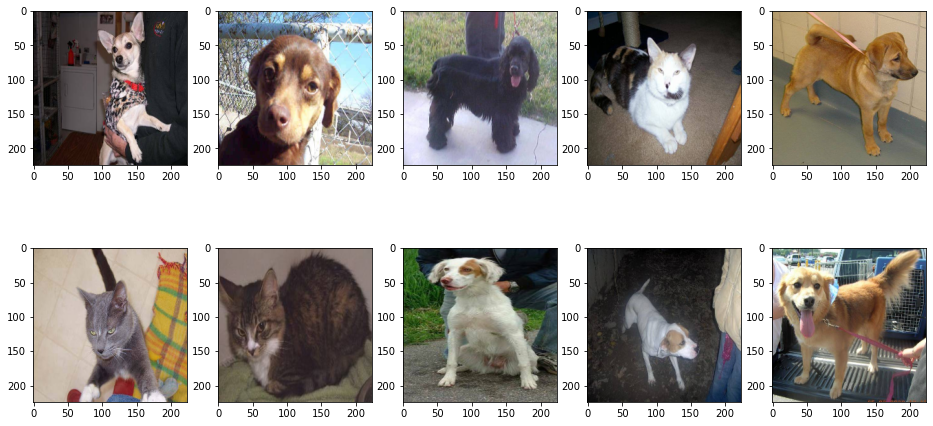

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(train_files[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
  #  subplot.set_title('%s' % path.split('/')[-1])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    plt.imshow(img)

## Загружаем предобученную модель

In [9]:
# base_model - объект класса keras.models.Model (Functional Model)
vgg_model_path = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = vgg16.VGG16(weights=vgg_model_path,
                         include_top=False,
                         input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [18]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Добавляем полносвязный слой

In [10]:
# фиксируем все веса предобученной сети
for layer in base_model.layers:
    layer.trainable = False

x = base_model.layers[-5].output
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                        #  activity_regularizer=tf.keras.regularizers.l2(1e-4),
                          kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x, name='dogs_vs_cats')


## Выводим архитектуру модели

In [11]:
model.summary()

Model: "dogs_vs_cats"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Компилируем модель и запускаем обучение

In [12]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [13]:
val_samples = 5  # число изображений в валидационной выборке

shuffle(train_files)  # перемешиваем обучающую выборку
validation_data = next(fit_generator(train_files[:val_samples], val_samples))
train_data = fit_generator(train_files[val_samples:])  # данные читаем функцией-генератором

# запускаем процесс обучения
model.fit(train_data,
          steps_per_epoch=10,  # число вызовов генератора за эпоху
          epochs=100,  # число эпох обучения
          validation_data=validation_data)

Epoch 1/100
10/10 [==============================] - 2s 175ms/step - loss: 703.2684 - accuracy: 0.6187 - val_loss: 1.8241e-04 - val_accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 1s 139ms/step - loss: 55.9199 - accuracy: 0.7781 - val_loss: 37.9763 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 2s 169ms/step - loss: 39.1511 - accuracy: 0.8250 - val_loss: 1.7640e-04 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 1s 133ms/step - loss: 28.0605 - accuracy: 0.8406 - val_loss: 1.7563e-04 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 1s 132ms/step - loss: 29.6732 - accuracy: 0.8656 - val_loss: 1.7525e-04 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 1s 132ms/step - loss: 35.4900 - accuracy: 0.8531 - val_loss: 1.7502e-04 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 1s 138ms/step - loss: 28.6428 - accuracy: 0.8781 - val_loss: 

10/10 [==============================] - 1s 132ms/step - loss: 0.1656 - accuracy: 0.9406 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 58/100
10/10 [==============================] - 1s 136ms/step - loss: 0.2724 - accuracy: 0.9125 - val_loss: 0.0992 - val_accuracy: 1.0000
Epoch 59/100
10/10 [==============================] - 1s 131ms/step - loss: 0.4563 - accuracy: 0.9156 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 60/100
10/10 [==============================] - 1s 131ms/step - loss: 0.1560 - accuracy: 0.9500 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 61/100
10/10 [==============================] - 2s 155ms/step - loss: 0.1913 - accuracy: 0.9312 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 62/100
10/10 [==============================] - 1s 134ms/step - loss: 0.1775 - accuracy: 0.9344 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 63/100
10/10 [==============================] - 1s 137ms/step - loss: 0.1853 - accuracy: 0.9125 - val_loss: 0.0948 - val_accuracy: 1.0000
Epoch

In [13]:
model.save('cats-dogs-vgg16.hdf5')

## Предсказания на проверочной выборке

In [14]:
test_pred = model.predict(
    predict_generator(test_files), steps=len(test_files))

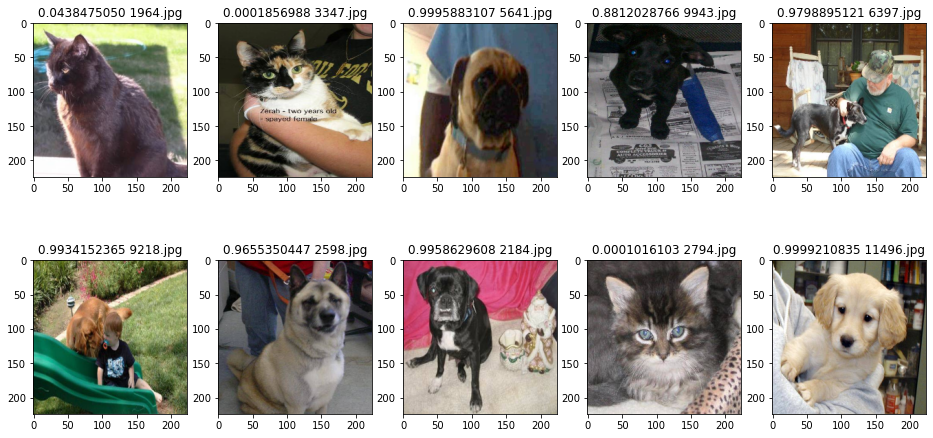

In [15]:
fig = plt.figure(figsize=(16, 8))
for i, (path, score) in enumerate(zip(test_files[:10], test_pred[:10]), 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%.10f %s' % (score, os.path.basename(path)))
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    subplot.imshow(img)

## Готовим данные для отправки

In [16]:
import re

with open('submit.csv', 'w') as dst:
    dst.write('id,label\n')
    for path, score in zip(test_files, test_pred):
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))

In [ ]:
#score 0.20079